###Imerso... Luiz Fernando Barbosa no Mar de dados da Alura desafio ENEM 
Analise de amostra de dados Geral do ENEM
Análise de todos os registros para canditados <= 14 anos
Análise completa para registros de MG

Caso necessite de algum arquivo irei disponibilizar no github, mas sinta a vontade em pedir luizfbarbosa@gmail.com

In [1]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head(20)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,ECEBDBAACAACBCEEECCACDCEEDBECADBDADEADCAEACBE,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACD

In [ ]:
dados.shape

(127380, 136)

In [ ]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [14]:
#Mostra por estado se tem ou não internet
dadosTotalLinhas,dadosTotalColunas = dados.shape
#https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas  
#Forma abaixo é bem eficiente para fazer group by ( com grandes quantidade de linhas)
dadosInternet = dados.groupby(['SG_UF_RESIDENCIA', 'Q025']).size().unstack(fill_value=0)
dadosInternet

Q025,A,B
SG_UF_RESIDENCIA,,
AC,485,461
AL,631,1632
AM,1310,1510
AP,518,529
BA,2338,7702
CE,2373,5008
DF,332,2076
ES,343,2207
GO,756,3512


##Verificando a Internet,Sexo,Computador, Celular  de por estado, na amostra, temos que Norte e Nordeste  tem menos acesso, e Sudeste e Sul tem mais acesso, sendo que o estado com melhor acesso a internet é SC. Em todos os estados a quantidade de mulheres é maior, com maior percentual na Bahia. Em relação a ter computadores, os percentuais menores são do Norte e Nordeste e o melhor é o Sul, seguindo do Sudeste. Em relação a celular, o menor percentual é de 95%, o que confirma as pesquisas em relação ao uso do mesmo. 

In [19]:
#MCalcula o percentual por estado de internet
dadosInternet['%TemInternet'] = dadosInternet['B'] / ( dadosInternet['A'] +  dadosInternet['B'] ) * 100
dadosInternet.sort_values('%TemInternet')

Q025,A,B,%TemInternet
SG_UF_RESIDENCIA,,,
AC,485,461,48.731501
PA,3568,3602,50.237099
AP,518,529,50.525310
MA,2624,2919,52.661014
AM,1310,1510,53.546099
PI,1279,1755,57.844430
RR,130,236,64.480874
TO,414,764,64.855688
CE,2373,5008,67.849885


In [20]:
#Mostra por estado relação Homens x Mulheres 
dadosSexoUF = dados.groupby(['SG_UF_RESIDENCIA', 'TP_SEXO']).size().unstack(fill_value=0)
dadosSexoUF['%Mulheres'] = dadosSexoUF['F'] / ( dadosSexoUF['M'] +  dadosSexoUF['F'] ) * 100
dadosSexoUF.sort_values('%Mulheres')

TP_SEXO,F,M,%Mulheres
SG_UF_RESIDENCIA,,,
RR,193,173,52.732240
CE,4139,3242,56.076412
AM,1610,1210,57.092199
RN,1692,1267,57.181480
PR,3025,2234,57.520441
MS,952,703,57.522659
MT,1296,934,58.116592
SC,1558,1115,58.286569
PB,2160,1530,58.536585


In [22]:
dadosComputadorUF = dados.groupby(['SG_UF_RESIDENCIA', 'Q024']).size().unstack(fill_value=0)
dadosComputadorUF['%TemComputador'] = (dadosComputadorUF['B'] + dadosComputadorUF['C'] + dadosComputadorUF['D'] + dadosComputadorUF['E']) / (dadosComputadorUF['A'] +dadosComputadorUF['B'] + dadosComputadorUF['C'] + dadosComputadorUF['D'] + dadosComputadorUF['E']) * 100
dadosComputadorUF.sort_values('%TemComputador')
dadosComputadorUF

Q024,A,B,C,D,E,%TemComputador
SG_UF_RESIDENCIA,,,,,,
MA,3898,1431,150,55,9,29.677070
AC,664,245,35,2,0,29.809725
PA,4944,1928,226,54,18,31.046025
AP,717,268,47,12,3,31.518625
AM,1827,842,103,28,20,35.212766
PI,1926,932,116,48,12,36.519446
CE,4674,2260,334,79,34,36.675247
SE,1096,599,86,26,8,39.614325
AL,1351,770,96,34,12,40.300486


In [23]:
dadosCelularUF = dados.groupby(['SG_UF_RESIDENCIA', 'Q022']).size().unstack(fill_value=0) 
dadosCelularUF['%TemCelular'] = (dadosCelularUF['B'] + dadosCelularUF['C'] + dadosCelularUF['D'] + dadosCelularUF['E']) / (dadosCelularUF['A'] +dadosCelularUF['B'] + dadosCelularUF['C'] + dadosCelularUF['D'] + dadosCelularUF['E']) * 100
dadosCelularUF.sort_values('%TemCelular')

Q022,A,B,C,D,E,%TemCelular
SG_UF_RESIDENCIA,,,,,,
AP,43,290,362,230,122,95.893028
CE,296,2271,2478,1466,870,95.989703
MA,212,1750,1887,1127,567,96.175356
AM,104,777,961,591,387,96.312057
TO,41,260,372,309,196,96.519525
PA,229,2289,2378,1460,814,96.806137
AC,25,305,321,191,104,97.357294
BA,249,2730,3337,2454,1270,97.519920
PI,71,915,980,660,408,97.659855


In [25]:
dadosInBrailleUF = dados.groupby(['SG_UF_RESIDENCIA', 'IN_BRAILLE']).size().unstack(fill_value=0) 
dadosInBrailleUF

IN_BRAILLE,0,1
SG_UF_RESIDENCIA,,
AC,945,1
AL,2263,0
AM,2820,0
AP,1047,0
BA,10040,0
CE,7381,0
DF,2408,0
ES,2550,0
GO,4268,0


In [26]:
dadosInLibrasUF = dados.groupby(['SG_UF_RESIDENCIA','IN_LIBRAS']).size().unstack(fill_value=0) 
dadosInLibrasUF

IN_LIBRAS,0,1
SG_UF_RESIDENCIA,,
AC,945,1
AL,2263,0
AM,2818,2
AP,1047,0
BA,10040,0
CE,7377,4
DF,2408,0
ES,2550,0
GO,4268,0


In [27]:
dadosInAutismoUF = dados.groupby(['SG_UF_RESIDENCIA', 'IN_AUTISMO' ]).size().unstack(fill_value=0) 
dadosInAutismoUF

IN_AUTISMO,0,1
SG_UF_RESIDENCIA,,
AC,946,0
AL,2262,1
AM,2820,0
AP,1047,0
BA,10039,1
CE,7380,1
DF,2407,1
ES,2549,1
GO,4267,1


In [28]:
dadosInDislexiaUF = dados.groupby(['SG_UF_RESIDENCIA','IN_DISLEXIA']).size().unstack(fill_value=0) 
dadosInDislexiaUF

IN_DISLEXIA,0,1
SG_UF_RESIDENCIA,,
AC,946,0
AL,2263,0
AM,2818,2
AP,1047,0
BA,10038,2
CE,7379,2
DF,2408,0
ES,2550,0
GO,4267,1


In [29]:
dadosInCegueiraUF = dados.groupby(['SG_UF_RESIDENCIA','IN_CEGUEIRA']).size().unstack(fill_value=0) 
dadosInCegueiraUF

IN_CEGUEIRA,0,1
SG_UF_RESIDENCIA,,
AC,945,1
AL,2263,0
AM,2820,0
AP,1047,0
BA,10039,1
CE,7381,0
DF,2408,0
ES,2550,0
GO,4268,0


In [ ]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [ ]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

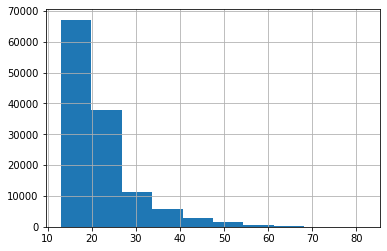

In [ ]:
dados["NU_IDADE"].hist()

In [32]:
#Mostra por estado relação de idades
dadosIdadeUF = dados.groupby(['SG_UF_RESIDENCIA', 'NU_IDADE']).size().unstack(fill_value=0)
dadosIdadeUF.sort_values('SG_UF_RESIDENCIA')

NU_IDADE,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,77,82
SG_UF_RESIDENCIA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,0,1,6,30,72,127,104,91,67,55,44,41,33,34,20,26,27,19,13,16,15,12,13,10,13,7,8,6,4,6,4,3,2,3,2,4,2,1,0,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AL,0,2,36,132,276,348,252,178,156,128,93,90,78,64,49,38,27,32,35,30,25,20,22,18,13,19,11,8,14,3,10,3,4,9,7,8,3,2,2,1,5,1,3,1,2,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
AM,0,4,34,87,303,418,308,236,173,149,133,112,73,99,60,53,49,53,55,44,40,30,30,30,27,27,30,24,12,14,11,12,11,12,13,5,4,4,6,5,2,4,7,3,3,3,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
AP,1,0,16,53,118,130,86,69,71,54,53,44,38,30,22,25,14,22,12,24,14,11,10,16,9,10,8,7,8,6,5,9,5,5,6,6,4,1,3,10,1,0,2,1,2,0,2,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
BA,1,13,152,560,1267,1486,1204,908,647,538,433,342,281,231,194,169,145,119,120,117,105,95,93,72,84,81,57,57,47,47,41,33,35,32,23,26,25,23,23,14,13,15,8,14,5,8,11,4,2,3,6,3,0,1,1,3,0,0,0,0,0,2,1,0,0
CE,0,15,150,477,1311,1562,897,621,415,292,215,188,140,140,94,95,69,76,66,61,50,46,42,46,45,28,28,18,26,12,22,13,8,13,12,11,12,8,3,12,10,5,2,5,6,3,3,2,1,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0
DF,0,4,29,113,326,389,280,225,155,103,81,89,65,54,43,36,27,40,24,28,21,16,24,16,27,27,18,23,10,8,10,11,7,11,15,3,11,8,3,2,2,2,5,3,3,2,0,3,1,2,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0
ES,0,1,25,135,356,420,346,217,158,122,89,64,62,65,51,34,31,33,28,30,25,24,29,19,18,20,21,14,12,7,9,9,9,8,10,8,4,5,5,4,6,1,0,4,3,3,0,1,0,0,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0
GO,0,7,105,341,746,799,449,324,211,193,163,109,93,88,76,52,48,56,38,39,30,30,28,18,22,17,26,16,20,17,4,14,13,11,12,4,9,4,2,7,4,5,6,2,1,1,2,1,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
dados["NU_IDADE"].mean()

7.498707258764504

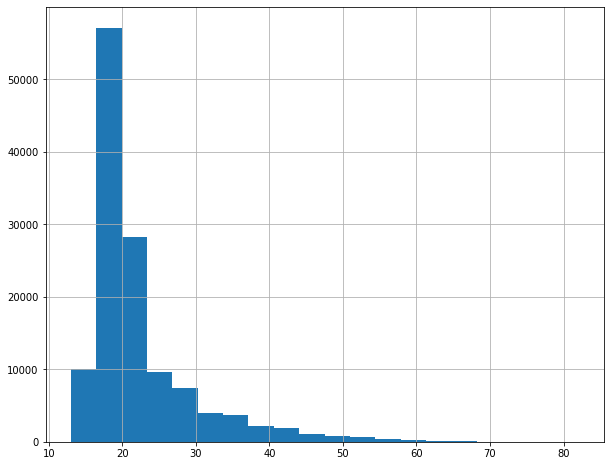

In [ ]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

In [ ]:
dados.query("IN_TREINEIRO == 1").value_counts()

Series([], dtype: int64)

In [ ]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

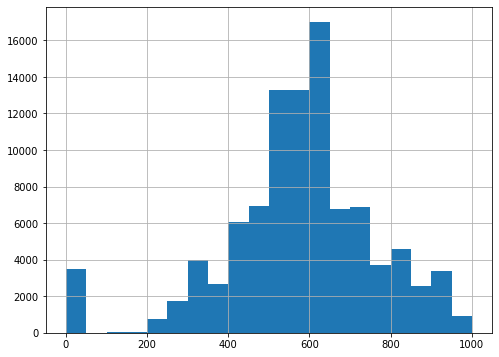

In [ ]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

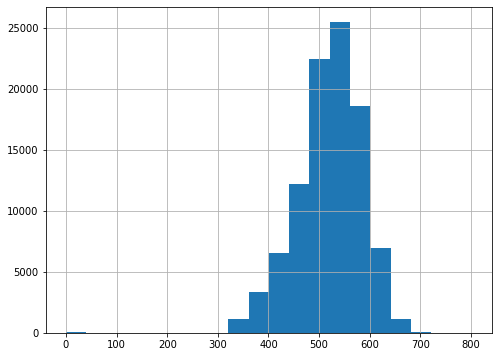

In [ ]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

In [ ]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [ ]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [ ]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

In [43]:
# Criar uma colunas para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [71]:
dadosSemNotaUF = dados.query("NU_NOTA_TOTAL == 0").groupby(['SG_UF_RESIDENCIA', 'NU_NOTA_TOTAL' ]).size().unstack(fill_value=0) 
dadosSemNotaUF

NU_NOTA_TOTAL,0.0
SG_UF_RESIDENCIA,
AC,217
AL,484
AM,898
AP,247
BA,2340
CE,1609
DF,600
ES,624
GO,1007


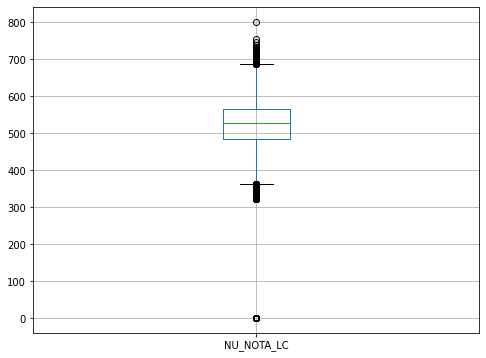

In [ ]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

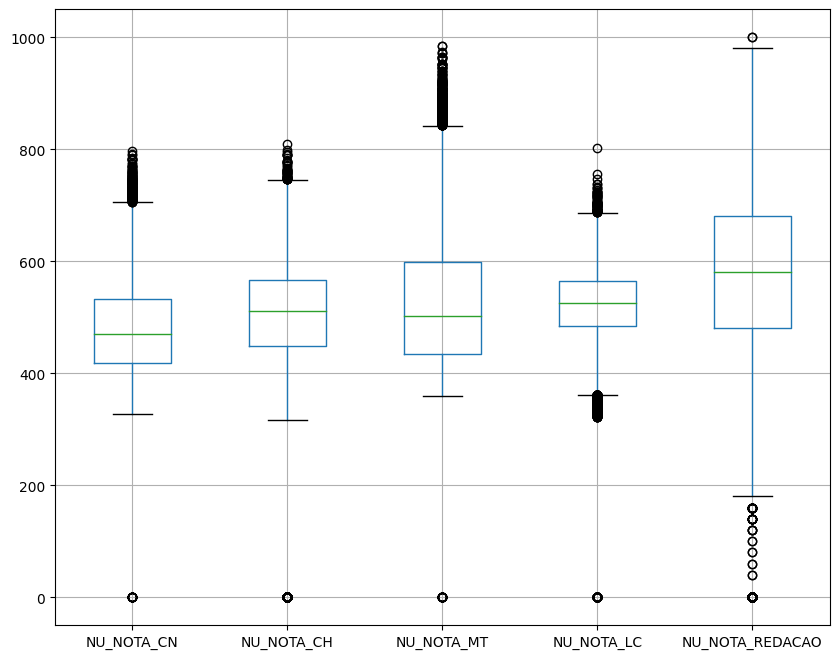

In [ ]:
dados[provas].boxplot(grid=True, figsize= (10,8))

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [58]:
#Desafio01: Proporção dos inscritos por idade.
#dados.query("NU_IDADE >=1")["NU_IDADE"].value_counts().sort_index().hist(bins = 20, figsize=(8, 6))

idade = dados["NU_IDADE"].value_counts()
total = dados.shape[0]
proporcao = round((idade/total)*100,4)
proporcao.sort_index()


13     0.0031
14     0.1107
15     1.5772
16     6.1470
17    16.6871
       ...   
73     0.0016
75     0.0016
76     0.0008
77     0.0008
82     0.0008
Name: NU_IDADE, Length: 65, dtype: float64

In [ ]:
#Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts().sort_index()

AP    1
BA    1
MT    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0, 0.5, 'Quantidade')

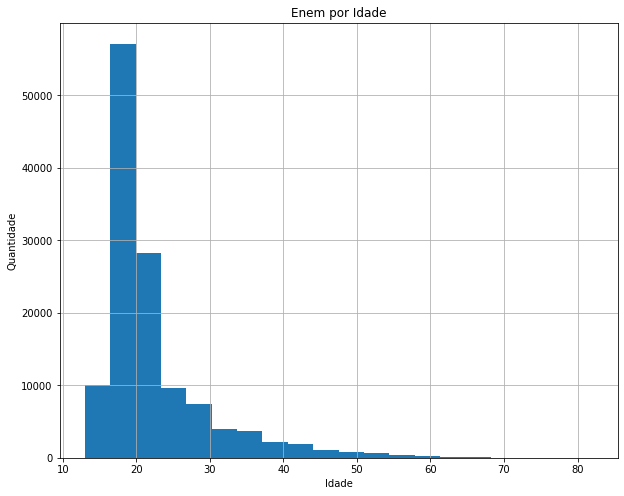

In [ ]:
#Desafio03: Adicionar título no gráfico
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))
# Add title and axis names
plt.title('Enem por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')


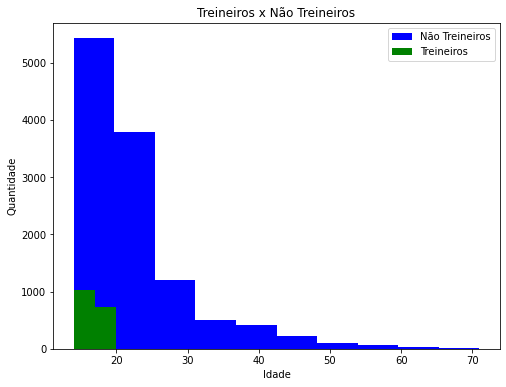

In [ ]:
#Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Treineiros x Não Treineiros')
treineiros = dados.query("IN_TREINEIRO == 1 & SG_UF_RESIDENCIA =='MG'")['NU_IDADE']
nao_treineiros = dados.query("IN_TREINEIRO == 0 & SG_UF_RESIDENCIA =='MG'")['NU_IDADE']
plt.hist(nao_treineiros,label='Não Treineiros', color='blue')
plt.hist(treineiros,label='Treineiros', color='green')
plt.legend(loc='upper right')



In [ ]:
dados.query("IN_TREINEIRO == 1 ")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

In [ ]:
#Desafio05: Comparar as distribuições das provas em inglês espanhol
ingles = dados.query("TP_LINGUA == 1 ").shape[0]
espanhol = dados.query("TP_LINGUA == 0 ").shape[0]
total = dados.shape[0]
proporcaoIngles = round((1-(ingles/total))*100,4)
proporcaoEspanhol = round((1-(espanhol/total))*100,4)
print(f'Proporção Ingles {proporcaoIngles} Proporção Espanhol {proporcaoEspanhol}')

Proporção Ingles 47.5514 Proporção Espanhol 52.4486


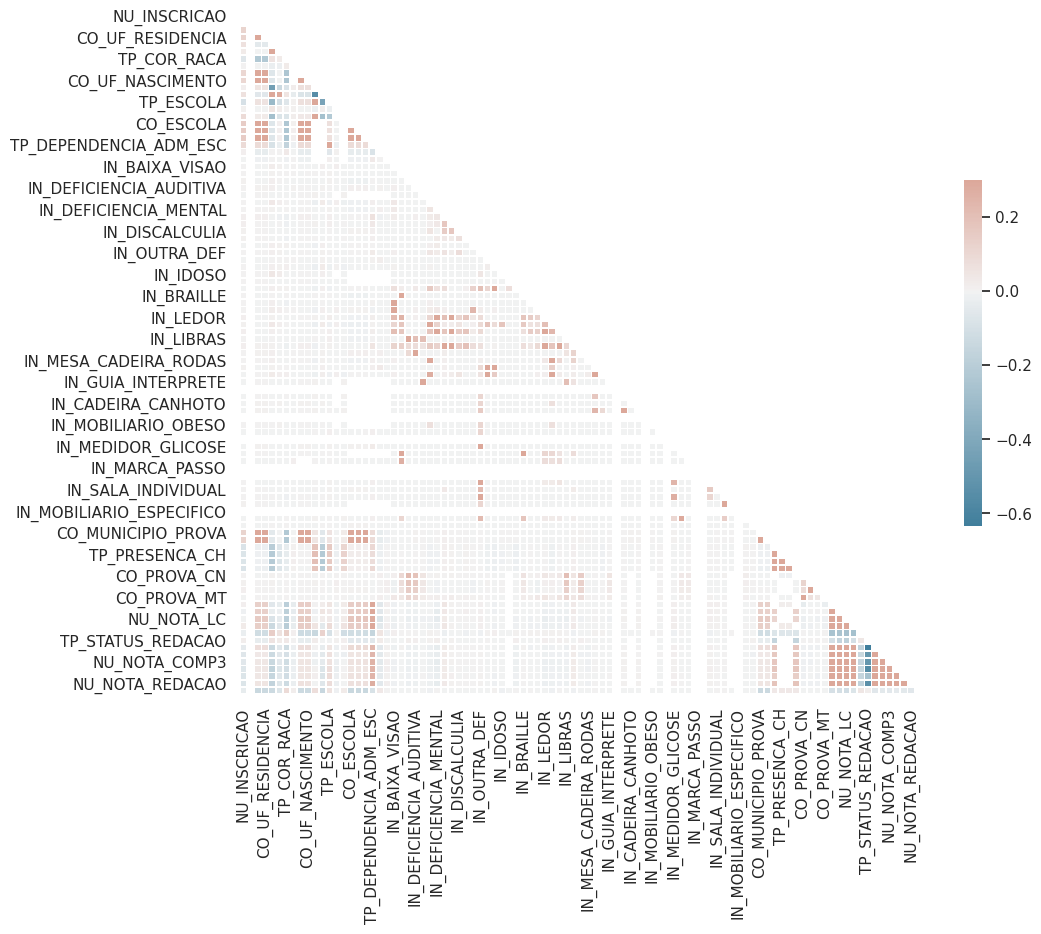

In [ ]:
#Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# calcula matriz de correlação
corr = dados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q


     \ 56.6MB 97.5MB/s
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 604kB 25.6MB/s 
     |████████████████████████████████| 3.1MB 34.2MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Fazendo uma analise dos dados
colunas = ['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q001', 'Q002','Q006', 'Q022', 'Q024', 'Q025']

# Filtrando algumas colunas
dadosAnalise = dados[colunas]
profile = ProfileReport(dadosAnalise,title='ENEM',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file('ProfileEnem.html')


Output hidden; open in https://colab.research.google.com to view.

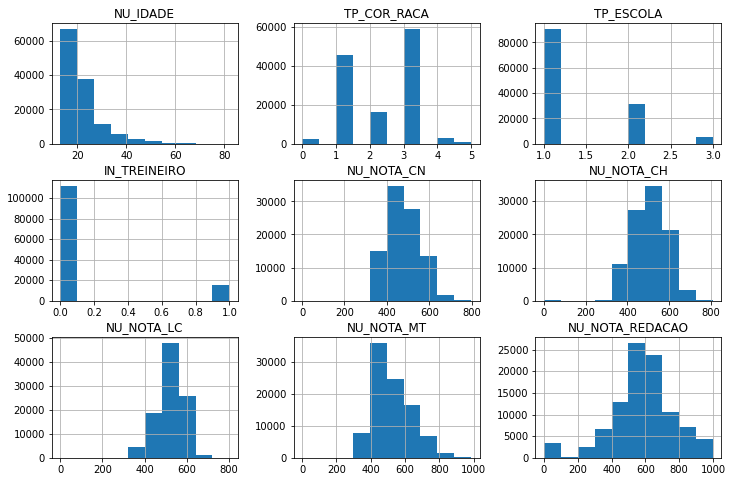

In [ ]:
dadosAnalise.hist(figsize=(12, 8))
plt.show()

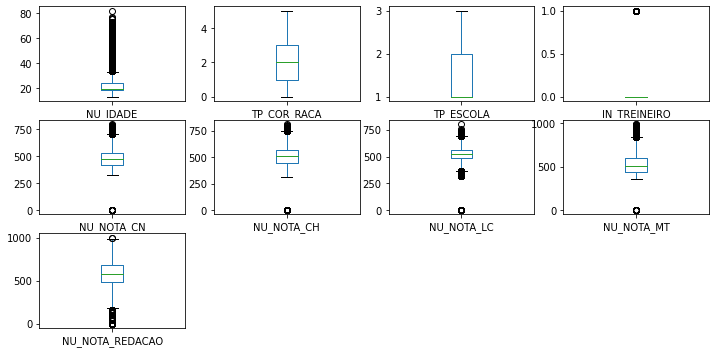

In [ ]:
dadosAnalise.plot(kind='box', figsize=(12, 8), subplots=True, layout=(4, 4))
plt.show()#The box plot gives clarity about the range of variables

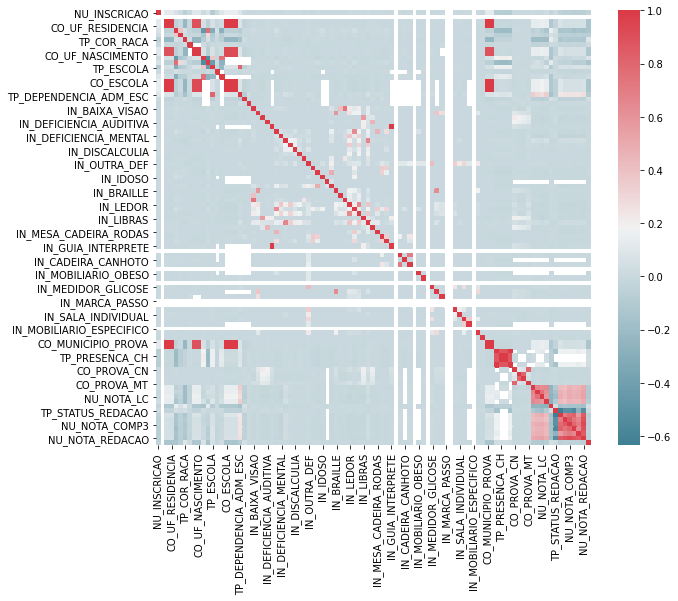

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = dados.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#Removendo colunas com correlação > 0.95
import numpy as np

# Create correlation matrix
corr_matrix = dados.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df = dados
# Drop features 
df.drop(to_drop, axis=1, inplace=True)
df.describe()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,...,IN_APOIO_PERNA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,127380.000000,127380.000000,127380.000000,71978.000000,127380.000000,28627.000000,28627.000000,28627.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,...,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,92758.000000,98043.000000,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,22.094355,1.076841,2.131198,1.029345,3.058310e+06,1.540493,2.961870,1.330515,1.004585,0.120906,2.257764,1.035037,1.005973,0.001099,0.000110,0.000259,0.000377,0.000008,0.001499,0.000479,0.001704,0.000353,0.000055,0.000228,0.000228,0.000659,0.000251,0.000746,0.000047,0.000008,0.001342,0.000039,0.000181,0.000801,0.001248,0.001515,0.001185,...,0.000455,0.0,0.000008,0.000008,0.000016,0.0,0.000008,0.000008,0.0,0.000118,0.000016,0.000008,0.0,0.0,0.000079,0.000031,0.000063,0.000008,0.0,0.000047,0.000079,0.729016,0.771667,504.508538,508.511745,512.506910,516.509864,477.964015,507.365912,520.463928,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,7.498707,0.440671,1.017373,0.202790,9.827584e+05,0.716452,4.106733,0.555043,0.067556,0.326019,0.755357,0.183876,0.122273,0.033134,0.010483,0.016094,0.019408,0.002802,0.038694,0.021878,0.041239,0.018792,0.007413,0.015087,0.015087,0.025671,0.015848,0.027299,0.006863,0.002802,0.036615,0.006265,0.013436,0.028286,0.035308,0.038896,0.034410,...,0.021334,0.0,0.002802,0.002802,0.003962,0.0,0.002802,0.002802,0.0,0.010851,0.003962,0.002802,0.0,0.0,0.008860,0.005604,0.007925,0.002802,0.0,0.006863,0.008860,0.445387,0.422110,1.197953,1.185302,1.163769,1.146852,76.296099,82.972839,64.556578,109.416939,0.499402,0.777411,33.250346,42.786693,40.030347,37.953250,59.380566,188.076455,1.475714
min,1.900010e+11,2019.0,1.100015e+06,13.000000,0.000000,0.000000,0.000000,1.100015e+06,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
df.shape

(127380, 126)

In [ ]:
cor = dados.corr().abs()
#Correlation with output variable
cor_target = abs(cor["NU_NOTA_REDACAO"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

NU_NOTA_CN           0.504903
NU_NOTA_CH           0.530950
NU_NOTA_LC           0.537690
TP_STATUS_REDACAO    0.532256
NU_NOTA_COMP1        0.851214
NU_NOTA_COMP2        0.892802
NU_NOTA_COMP3        0.935235
NU_NOTA_COMP4        0.891793
NU_NOTA_COMP5        0.846894
NU_NOTA_REDACAO      1.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [40]:
print('DESAFIO 01')

def pegaTotalPorIdade(idade):
  return len(dados.query(f'NU_IDADE == {idade}'))

def calculaPorcentagem(idade):
  totalPorIdade = pegaTotalPorIdade(idade)
  return ('%.2f ' % (totalPorIdade / 127380 * 100)) + '%'

idades = dados['NU_IDADE'].unique()
totalPorIdade = map(pegaTotalPorIdade, idades)
porcentagemPorIdade = map(calculaPorcentagem, idades)

data = {
    'Idades': idades,
    'Total': totalPorIdade,
    '%': porcentagemPorIdade
}

dadosAgrupadosIdade =pd.DataFrame(data) 
dadosAgrupadosIdade.sort_values('Idades')

DESAFIO 01


,Idades,Total,%
59,13,4,0.00 %
36,14,141,0.11 %
10,15,2009,1.58 %
3,16,7830,6.15 %
0,17,21256,16.69 %
...,...,...,...
54,73,2,0.00 %
64,75,2,0.00 %
63,76,1,0.00 %
60,77,1,0.00 %


###Desafio Thainá 
Como os conhecimentos do python ainda são novos, criei uma rotina em java que o buscou todos os arquivos, leu um a um e foi criando um arquivo separado com todos os registro com idade <= 14 anos, não mudei o separador dos dados, continua como os originais que estão com ";".
Aqui tivemos algo diferente, pois o Norte e Nordeste estão com mais alunos menores fazendo o Enem, onde a logica nos levaria a pensar que teriamos os estados mais populosos com uma quantidade maior.

```
# Isto está formatado como código
```



In [72]:
#função utilizada apenas para realizar o upload dos dados para o google colab
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving enem1314.csv to enem1314.csv


In [74]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="enem1314.csv"
df= pd.read_csv(nome_do_arquivo, sep = ';')

In [75]:
df.head()


,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,65207,190001069836,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,G,C,D,6,C,A,B,C,B,B,B,A,B,A,A,A,A,B,A,A,D,B,B,B
1,81485,190001086114,2019,1200104,Brasiléia,12,AC,14,M,1,3,1,1200104.0,Brasiléia,12.0,AC,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEBCABABABEDECDABDCDCBCCEDBECADEABEADBECBACAE,99999ABCDCABAEADCEDDDADCCBEAEEBEECCBEBBCDDEBBA...,CAEDDBEAACAEDECBBEABADEACEDCDCEDDEEBEBEAECBBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,140.0,120.0,140.0,100.0,600.0,G,F,D,D,4,D,A,C,C,B,B,B,A,B,A,B,A,A,C,A,B,D,B,B,B
2,981200,190001985848,2019,1200401,Rio Branco,12,AC,14,F,1,1,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CBABADEBCEAEDEABDDBBEDBBBEDBEAEDBEEECEDADCDBC,99999BDCCACEADAEACECCBBABEDBBCCCEBDAADCAEBCDCA...,DACDCBAAECCBABCEACEECADADABCEAAEEADECEBDCBADB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,180.0,160.0,180.0,860.0,G,E,D,B,4,O,A,B,D,B,A,B,A,A,A,A,A,A,B,B,B,E,B,B,B
3,984973,190001989621,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,DECEDEECCABABDACDBCAEBDDBDEEADECACDEBBAEECDCD,99999DAABCABABBCCDABDDDEEDACECEEEECCCDECAEBDAA...,ACDCBDDDAAEECBCCBEAABBECDDBBDBECEECDCEABBECDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,E,B,B,5,H,A,C,D,A,C,B,A,B,A,A,A,A,B,A,A,E,B,B,B
4,988187,190001992835,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEBBDBACABCCACEBECCCCBDCBBBDBDCCDCABCAAABDBCB,99999CBDABCCBDBDADBDDBCECBAEBCBCCC.BEAAAADAABB...,DBDCADACADEBCBDBCBEBADBBCECEBCDCAABDCBAADACEE,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,160.0,100.0,620.0,G,G,E,D,4,I,C,C,D,C,A,B,B,B,B,A,A,B,E,B,A,D,B,B,B


In [ ]:
df.describe()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5.663000e+03,5.663000e+03,5663.0,5.663000e+03,5663.000000,5663.000000,5663.000000,5663.000000,5663.000000,5.499000e+03,5499.000000,5663.000000,5663.000000,5663.000000,131.0,5663.000000,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000,73.000000,5663.000000,5663.0,5663.0,5663.0,5663.0,5663.0,5663.0,5663.000000,5663.000000,5663.0,5663.000000,5663.0,5663.000000,5663.0,5663.0,5663.0,5663.0,5663.000000,...,5663.0,5663.0,5663.0,5663.0,5663.0,5663.000000,5663.0,5663.0,5663.0,5663.0,5663.0,5663.0,5663.000000,5663.0,5663.0,5663.0,5663.0,5.663000e+03,5663.000000,5663.000000,5663.000000,5663.000000,5663.000000,4530.000000,4953.000000,4953.000000,4530.000000,4530.000000,4953.000000,4953.000000,4530.000000,5663.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,5663.000000
mean,3.149969e+06,1.900042e+11,2019.0,2.841205e+06,28.300371,13.835070,0.988169,1.965389,1.033375,2.865561e+06,28.538280,3.546530,0.007946,1.025781,1.0,0.395373,2.931754e+07,2.933886e+06,29.205479,2.493151,1.054795,1.013699,0.000706,0.0,0.0,0.0,0.0,0.0,0.0,0.001413,0.000177,0.0,0.000706,0.0,0.000706,0.0,0.0,0.0,0.0,0.000530,...,0.0,0.0,0.0,0.0,0.0,0.000530,0.0,0.0,0.0,0.0,0.0,0.0,0.000177,0.0,0.0,0.0,0.0,2.842910e+06,28.317676,0.800989,0.874978,0.874978,0.800989,504.500442,508.489804,512.508984,516.516777,470.390464,501.341369,520.832506,537.305408,0.299311,1.173834,121.118514,117.540884,111.504139,119.685039,86.149808,555.998385,4.000353
std,1.419658e+06,1.419749e+06,0.0,1.103029e+06,11.000049,0.917081,0.236320,1.060449,0.233495,1.098535e+06,10.954972,0.566878,0.134641,0.184261,0.0,0.488974,1.084715e+07,1.090296e+06,10.869119,0.868000,0.229154,0.117041,0.026570,0.0,0.0,0.0,0.0,0.0,0.0,0.037562,0.013289,0.0,0.026570,0.0,0.026570,0.0,0.0,0.0,0.0,0.023012,...,0.0,0.0,0.0,0.0,0.0,0.023012,0.0,0.0,0.0,0.0,0.0,0.0,0.013289,0.0,0.0,0.0,0.0,1.103730e+06,11.007395,0.400616,0.331307,0.331307,0.400616,1.105048,1.116021,1.133091,1.119610,69.293081,76.975460,59.805155,101.305469,0.457997,0.819951,35.321634,43.312107,40.803952,38.642945,58.298915,189.685719,1.119336
min,1.608000e+03,1.900010e+11,2019.0,1.100023e+06,11.000000,1.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,1.000000,0.000000,1.000000,1.0,0.000000,1.100989e+07,1.100403e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.100023e+06,11.000000,0.000000,0.000000,0.000000,0.000000,503.000000,507.000000,511.000000,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.109073e+06,1.900031e+11,2019.0,2.111300e+06,21.000

Text(0, 0.5, 'Quantidade')

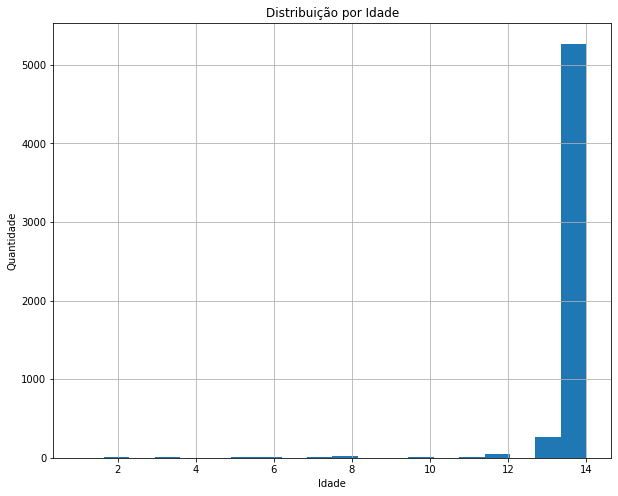

In [77]:
import matplotlib.pyplot as plt
import numpy as np
df["NU_IDADE"].hist(bins = 20, figsize = (10,8))
# Add title and axis names
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')


In [ ]:
df.query("IN_TREINEIRO >= 0")["NU_IDADE"].value_counts().sort_index()

1        2
2        4
3        4
4        2
5        5
6        9
7       15
8       25
9        3
10       6
11       9
12      46
13     266
14    5267
Name: NU_IDADE, dtype: int64

In [ ]:
df.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PA    509
CE    467
PE    458
MA    457
BA    415
SP    406
PB    395
MG    345
GO    303
SE    246
PI    227
PR    166
MT    154
AM    139
TO    124
DF    109
RJ    108
RO     98
MS     88
SC     78
RN     76
AP     62
RS     59
AL     56
AC     51
ES     47
RR     20
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
df.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PA    0.089882
CE    0.082465
PE    0.080876
MA    0.080699
BA    0.073283
SP    0.071693
PB    0.069751
MG    0.060922
GO    0.053505
SE    0.043440
PI    0.040085
PR    0.029313
MT    0.027194
AM    0.024545
TO    0.021897
DF    0.019248
RJ    0.019071
RO    0.017305
MS    0.015539
SC    0.013774
RN    0.013420
AP    0.010948
RS    0.010419
AL    0.009889
AC    0.009006
ES    0.008299
RR    0.003532
Name: SG_UF_RESIDENCIA, dtype: float64

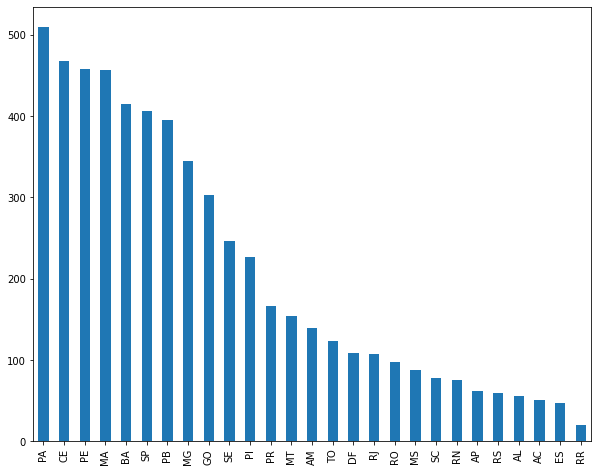

In [ ]:
df["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))

In [78]:
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)
df.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,65207,190001069836,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,G,C,D,6,C,A,B,C,B,B,B,A,B,A,A,A,A,B,A,A,D,B,B,B,0.0
1,81485,190001086114,2019,1200104,Brasiléia,12,AC,14,M,1,3,1,1200104.0,Brasiléia,12.0,AC,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCDCABAEADCEDDDADCCBEAEEBEECCBEBBCDDEBBA...,CAEDDBEAACAEDECBBEABADEACEDCDCEDDEEBEBEAECBBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,140.0,120.0,140.0,100.0,600.0,G,F,D,D,4,D,A,C,C,B,B,B,A,B,A,B,A,A,C,A,B,D,B,B,B,2639.8
2,981200,190001985848,2019,1200401,Rio Branco,12,AC,14,F,1,1,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BDCCACEADAEACECCBBABEDBBCCCEBDAADCAEBCDCA...,DACDCBAAECCBABCEACEECADADABCEAAEEADECEBDCBADB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,180.0,160.0,180.0,860.0,G,E,D,B,4,O,A,B,D,B,A,B,A,A,A,A,A,A,B,B,B,E,B,B,B,3094.0
3,984973,190001989621,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999DAABCABABBCCDABDDDEEDACECEEEECCCDECAEBDAA...,ACDCBDDDAAEECBCCBEAABBECDDBBDBECEECDCEABBECDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,E,B,B,5,H,A,C,D,A,C,B,A,B,A,A,A,A,B,A,A,E,B,B,B,2200.3
4,988187,190001992835,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999CBDABCCBDBDADBDDBCECBAEBCBCCC.BEAAAADAABB...,DBDCADACADEBCBDBCBEBADBBCECEBCDCAABDCBAADACEE,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,160.0,100.0,620.0,G,G,E,D,4,I,C,C,D,C,A,B,B,B,B,A,A,B,E,B,A,D,B,B,B,2678.9


Text(0.5, 1.0, 'Boxplot das notas total pela renda')

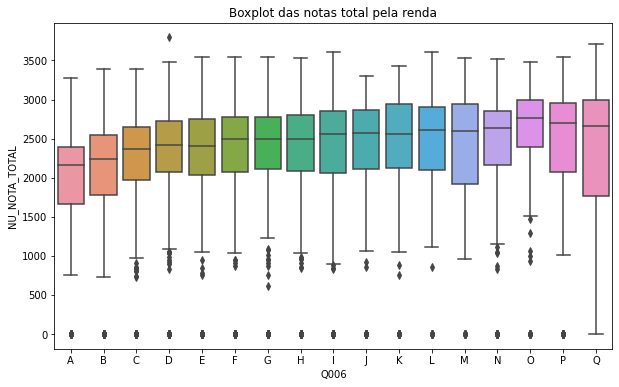

In [85]:
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df, order = renda_ordenada)
plt.title("Boxplot das notas total pela renda")

In [79]:
# Analisar notas zero
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
df[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,NaN,NaN,NaN,NaN,NaN,0.0
15,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
45,NaN,NaN,NaN,NaN,NaN,0.0
55,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
5603,NaN,NaN,NaN,NaN,NaN,0.0
5624,NaN,NaN,NaN,NaN,NaN,0.0
5639,NaN,NaN,NaN,NaN,NaN,0.0
5644,NaN,NaN,NaN,NaN,NaN,0.0


In [80]:
#remover notas zero
dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
1,81485,190001086114,2019,1200104,Brasiléia,12,AC,14,M,1,3,1,1200104.0,Brasiléia,12.0,AC,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCDCABAEADCEDDDADCCBEAEEBEECCBEBBCDDEBBA...,CAEDDBEAACAEDECBBEABADEACEDCDCEDDEEBEBEAECBBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,140.0,120.0,140.0,100.0,600.0,G,F,D,D,4,D,A,C,C,B,B,B,A,B,A,B,A,A,C,A,B,D,B,B,B,2639.8
2,981200,190001985848,2019,1200401,Rio Branco,12,AC,14,F,1,1,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BDCCACEADAEACECCBBABEDBBCCCEBDAADCAEBCDCA...,DACDCBAAECCBABCEACEECADADABCEAAEEADECEBDCBADB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,180.0,160.0,180.0,860.0,G,E,D,B,4,O,A,B,D,B,A,B,A,A,A,A,A,A,B,B,B,E,B,B,B,3094.0
3,984973,190001989621,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999DAABCABABBCCDABDDDEEDACECEEEECCCDECAEBDAA...,ACDCBDDDAAEECBCCBEAABBECDDBBDBECEECDCEABBECDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,E,B,B,5,H,A,C,D,A,C,B,A,B,A,A,A,A,B,A,A,E,B,B,B,2200.3
4,988187,190001992835,2019,1200401,Rio Branco,12,AC,14,F,1,3,1,1200401.0,Rio Branco,12.0,AC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999CBDABCCBDBDADBDDBCECBAEBCBCCC.BEAAAADAABB...,DBDCADACADEBCBDBCBEBADBBCECEBCDCAABDCBAADACEE,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,160.0,100.0,620.0,G,G,E,D,4,I,C,C,D,C,A,B,B,B,B,A,A,B,E,B,A,D,B,B,B,2678.9
5,995336,190001999984,2019,1200401,Rio Branco,12,AC,14,M,1,3,1,1200401.0,Rio Branco,12.0,AC,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999ADABACDAECEEBEDAEDBDCDDEEACDDCAECCAEADDDB...,CDECBBEBCADCDAEDAEBBAECCEDCDCBDABDCEBDADDADBE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,80.0,80.0,120.0,0.0,400.0,F,F,D,D,4,E,A,C,C,B,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,1994.1


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Construct plot
sns.swarmplot(x="NU_NOTA_TOTAL", y="NU_NOTA_REDACAO", data=dados_sem_notas_zero)

# Show plot
plt.show()

Text(0.5, 1.0, 'Boxplot da nota total pela renda da Amostra BR')

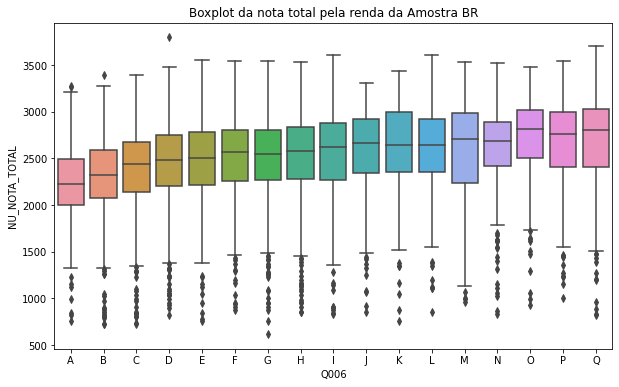

In [86]:
# Notas pela Renda sem as notas zero
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot da nota total pela renda da Amostra BR")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


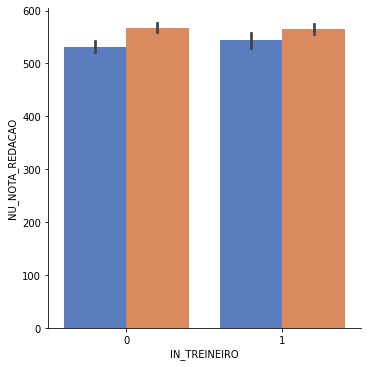

In [88]:
# Import necessarily libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a factorplot
g = sns.factorplot( "IN_TREINEIRO","NU_NOTA_REDACAO", "TP_SEXO", data=dados_sem_notas_zero, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()

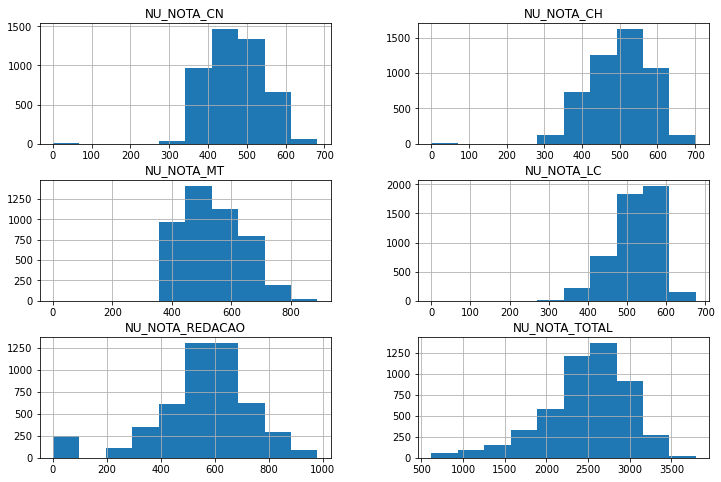

In [ ]:
dados_sem_notas_zero[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO",'NU_NOTA_TOTAL']].hist(figsize=(12, 8))
plt.show()

In [ ]:
dados_sem_notas_zero[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,4530.000000,4953.000000,4530.000000,4953.000000,4953.000000,5000.000000
mean,470.390464,501.341369,537.305408,520.832506,555.998385,2476.309900
std,69.293081,76.975460,101.305469,59.805155,189.685719,510.151521
min,0.000000,0.000000,0.000000,0.000000,0.000000,620.000000
25%,415.125000,445.400000,455.600000,486.300000,480.000000,2222.825000
50%,467.750000,507.800000,527.100000,529.900000,580.000000,2543.600000
75%,524.575000,560.000000,612.375000,564.800000,660.000000,2833.700000
max,682.400000,702.100000,890.200000,676.500000,980.000000,3794.500000


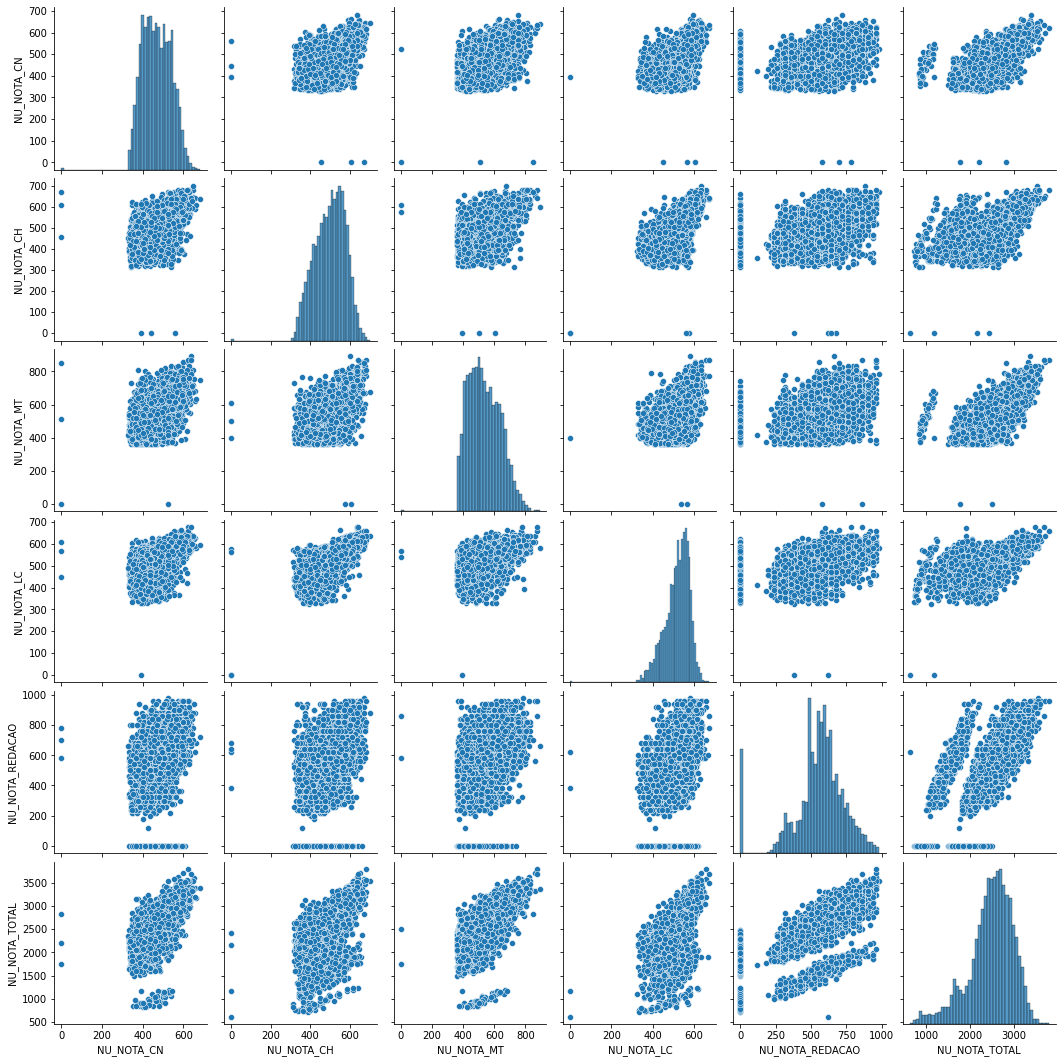

In [ ]:
sns.pairplot(dados_sem_notas_zero[provas])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


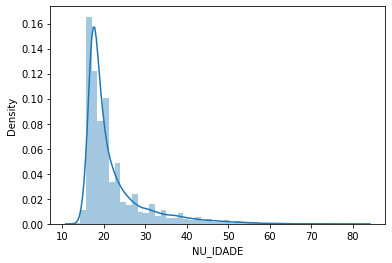

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(dados['NU_IDADE'])

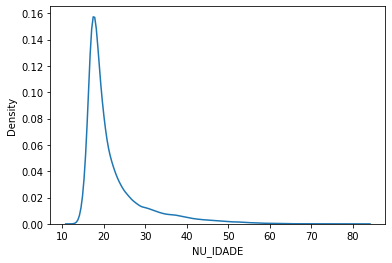

In [ ]:
sns.kdeplot(dados['NU_IDADE'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


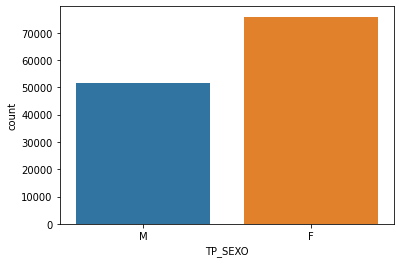

In [ ]:
sns.countplot(dados['TP_SEXO'])

In [ ]:
#Qual a media de idade dos que tiraram zero (da amostra incial)
df = dados
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)
df.head()

#&(df['sex']=='male')
df[(df['NU_NOTA_TOTAL']==0)]['NU_IDADE'].mean()

24.982065701940883

In [ ]:
df[(df['NU_NOTA_TOTAL']==0)].count()

NU_INSCRICAO               29162
NU_ANO                     29162
CO_MUNICIPIO_RESIDENCIA    29162
NO_MUNICIPIO_RESIDENCIA    29162
CO_UF_RESIDENCIA           29162
                           ...  
Q022                       29162
Q023                       29162
Q024                       29162
Q025                       29162
NU_NOTA_TOTAL              29162
Length: 137, dtype: int64

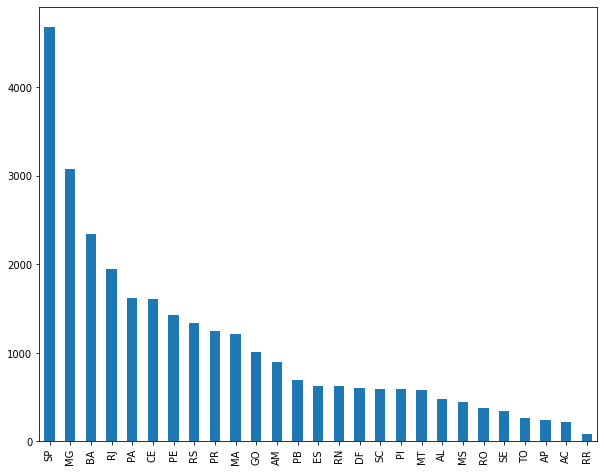

In [ ]:
# Mostrando a quantidade de notas zero por estado 
df_nota_zero = df[(df['NU_NOTA_TOTAL']==0)]
df_nota_zero["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))

In [ ]:
# Representing data using violin form
#Os gráficos de violino podem ser inferidos como uma combinação de gráfico de caixa no meio e gráficos de distribuição (estimativa de densidade do kernel) em ambos os lados dos dados. Isso pode nos dar os detalhes da distribuição, como se a distribuição é mutimodal, Skewness etc.
# o colab não deu conta de rodar, então ... rode por conta e risco.
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'NU_NOTA_TOTAL', y = 'NU_NOTA_CN', data = df)
plt.subplot(2,2,2)
sns.violinplot(x = 'NU_NOTA_TOTAL', y = 'NU_NOTA_CH', data = df)
plt.subplot(2,2,3)
sns.violinplot(x = 'NU_NOTA_TOTAL', y = 'NU_NOTA_MT', data = df)
plt.subplot(2,2,4)
sns.violinplot(x = 'NU_NOTA_TOTAL', y = 'NU_NOTA_REDACAO', data = df)




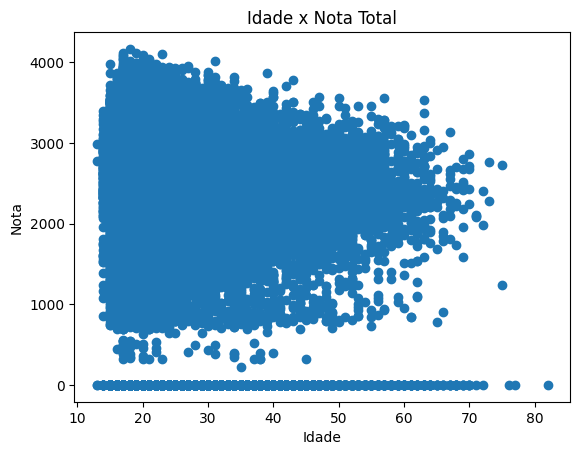

In [ ]:
#Sera que a quantidade de celulares / tv nas casas influenciam na nota?
#https://github.com/leandrocl2005/complete_data_visualization_with_python/blob/master/simple_eda.ipynb
#https://blog.caelum.com.br/analise-de-dados-media-ou-visualizar-a-distribuicao/amp/
plt.rcdefaults()

xdata = dados['NU_IDADE']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Idade x Nota Total')
plt.xlabel('Idade')
plt.ylabel('Nota')
plt.show()



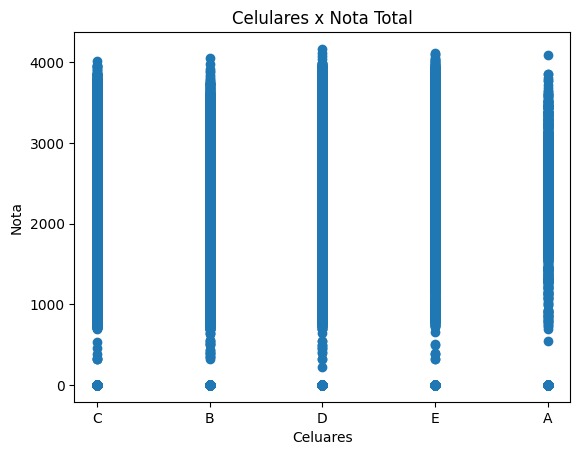

In [ ]:
plt.rcdefaults()

xdata = dados['Q022']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Celulares x Nota Total')
plt.xlabel('Celuares')
plt.ylabel('Nota')
plt.show()

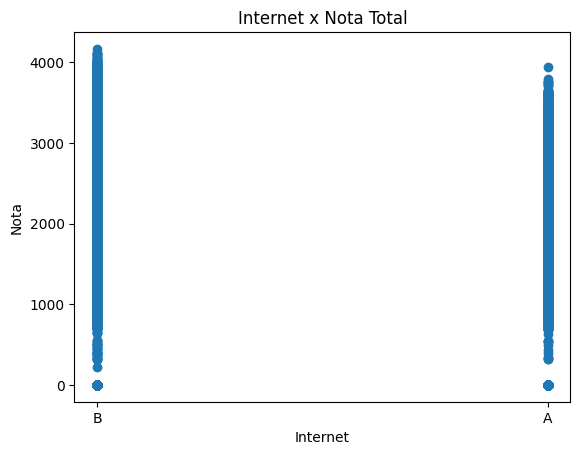

In [ ]:
plt.rcdefaults()

xdata = dados['Q025']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Internet x Nota Total')
plt.xlabel('Internet')
plt.ylabel('Nota')
plt.show()

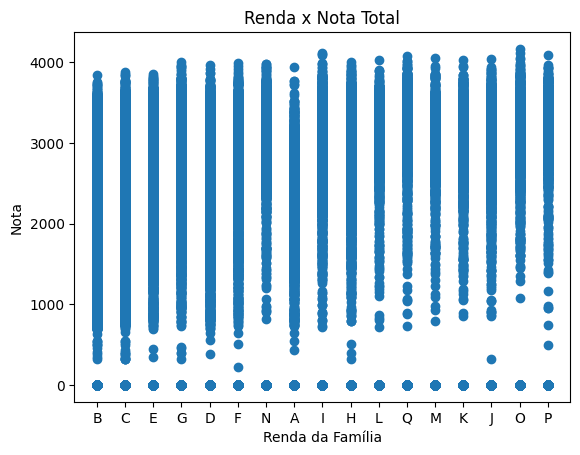

In [ ]:
plt.rcdefaults()

xdata = dados['Q006']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Renda x Nota Total')
plt.xlabel('Renda da Família')
plt.ylabel('Nota')
plt.show()

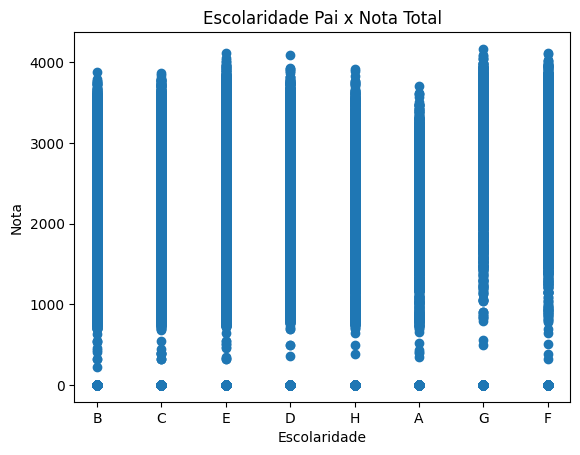

In [ ]:
plt.rcdefaults()

xdata = dados['Q001']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Escolaridade Pai x Nota Total')
plt.xlabel('Escolaridade')
plt.ylabel('Nota')
plt.show()

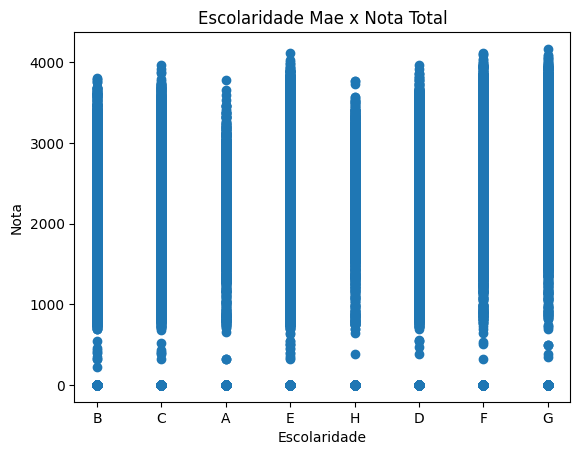

In [ ]:
plt.rcdefaults()

xdata = dados['Q002']
ydata = dados['NU_NOTA_TOTAL']

plt.scatter(x=xdata, y=ydata)
plt.title('Escolaridade Mae x Nota Total')
plt.xlabel('Escolaridade')
plt.ylabel('Nota')
plt.show()

In [ ]:
https://datascience.stackexchange.com/questions/27964/how-to-download-dynamic-files-created-during-work-on-google-colab
https://colab.research.google.com/notebooks/io.ipynb

###Vamos Fazer algumas verificações com a base completa de MG

In [89]:
#liberando acesso do colab aos arquivos no drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [108]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="/content/gdrive/My Drive/mg.csv"
df= pd.read_csv(nome_do_arquivo, sep = ';')

In [109]:
df.head()
dadosMG = df

In [110]:
dadosMG = df.drop(columns=['ID', 'CO_PROVA_CN' ,'CO_PROVA_CH' , 'CO_PROVA_LC' ,'CO_PROVA_MT' ,'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT'])


In [160]:
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dadosMG["NU_NOTA_TOTAL"] = dadosMG[provas].sum(axis=1)
dadosMG.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_INDICE_SE
0,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,512.6,564.6,533.4,626.4,0,1.0,180.0,180.0,160.0,180.0,160.0,860.0,4,5,1,3,3,8,0,2,3,1,0,1,0,1,0,1,0,0,3,0,0,3,1,1,1,3097.0,41
1,190001009861,2019,3111705,Canaã,31,MG,20,M,1,1,1,1702109.0,Araguaína,17.0,TO,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5,3,0,1,2,0,1,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0.0,18
2,190001021622,2019,3104007,Araxá,31,MG,24,M,1,2,1,3104007.0,Araxá,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,3,5,0,1,3,0,0,1,0,1,1,0,0,0,2,1,0,2,0,0,1,0.0,26
3,190001026636,2019,3106200,Belo Horizonte,31,MG,33,M,1,1,1,3118304.0,Conselheiro Lafaiete,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,3,3,3,15,1,3,3,2,0,1,1,1,0,1,0,1,1,0,0,3,0,3,1,0.0,54
4,190001026742,2019,3162401,São João da Ponte,31,MG,23,M,1,3,1,3162401.0,São João da Ponte,31.0,MG,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,621.0,654.4,595.8,726.8,0,1.0,160.0,200.0,140.0,160.0,140.0,800.0,1,3,1,1,3,3,0,1,3,1,1,1,0,0,0,0,0,0,1,1,0,2,0,1,0,3398.0,24


In [94]:
dadosMG.value_counts()

 NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA   CO_MUNICIPIO_ESC  NO_MUNICIPIO_ESC    CO_UF_ESC  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  IN_LEITURA_LABIAL  IN_MESA_CADEIRA_RODAS  IN_MESA_CADEIRA_SEPARADA  IN_APOIO_PERNA  IN_GUIA_INTERPRETE  IN_COMPUTADOR

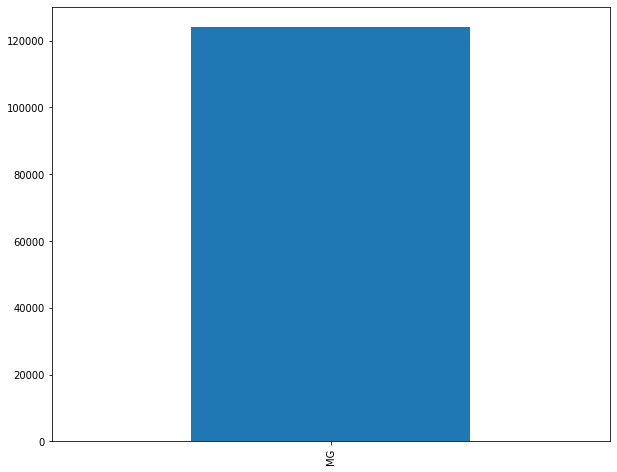

In [95]:
# Mostrando a quantidade de notas zero por estado 
df_nota_zero = dadosMG[(dadosMG['NU_NOTA_TOTAL']==0)]
df_nota_zero["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))

In [97]:
#quantidade de Notas Zero em Minas
quantidadeNotaZero = df_nota_zero.shape[0]
quantidadeNotaZero

123966

Text(0.5, 1.0, 'Boxplot da nota total pela renda')

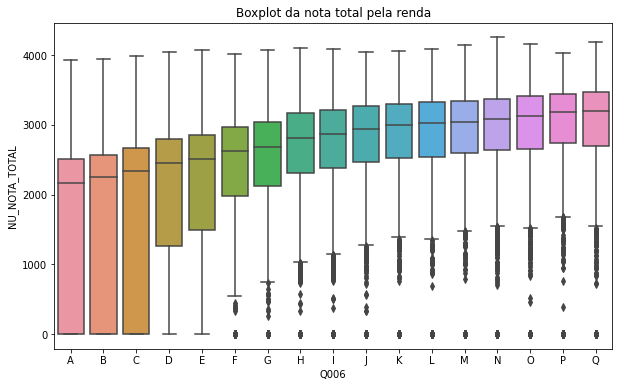

In [98]:
#Vamos analisar todos os alunos por classe
import matplotlib.pyplot as plt
import seaborn as sns

renda_ordenada = dadosMG["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dadosMG, order = renda_ordenada)
plt.title("Boxplot da nota total pela renda")

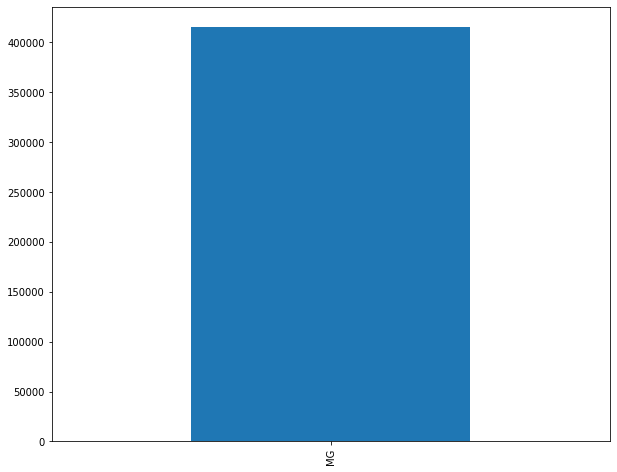

In [99]:
# Mostrando a quantidade de notas zero por estado 
df_nota_sem_zero = dadosMG[(dadosMG['NU_NOTA_TOTAL']>0)]
df_nota_sem_zero["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))

In [100]:
#quantidade de Notas que não zeraram em Minas
quantidadeNotaSemZero = df_nota_sem_zero.shape[0]
quantidadeNotaSemZero

414930

Text(0.5, 1.0, 'Boxplot da nota total pela renda [sem notas zero]')

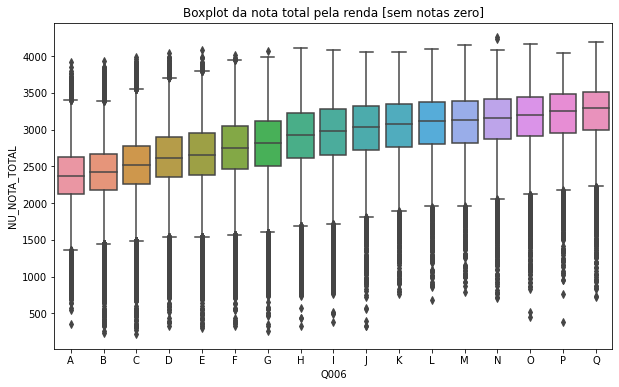

In [101]:
#Vamos analisar todos os alunos por classe
import matplotlib.pyplot as plt
import seaborn as sns

renda_ordenada = df_nota_sem_zero["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_nota_sem_zero, order = renda_ordenada)
plt.title("Boxplot da nota total pela renda [sem notas zero]")

Text(0.5, 1.0, 'Boxplot da nota total por escola [sem notas zero]')

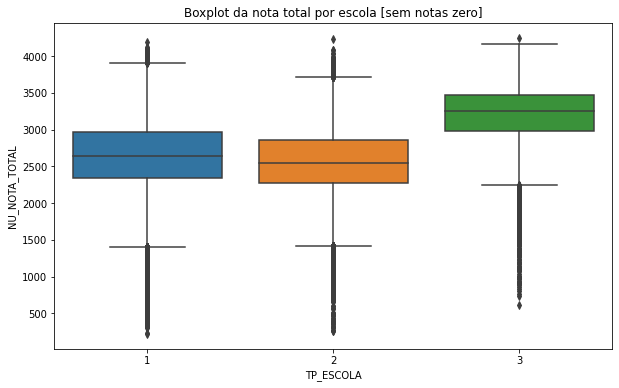

In [ ]:
#Vamos analisar todos os alunos por escola
# 1 - nas respondeu
# 2 - publica
# 3 - privada
# 4 - exterior
import matplotlib.pyplot as plt
import seaborn as sns

escola_ordenada = df_nota_sem_zero["TP_ESCOLA"].unique()
escola_ordenada.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="TP_ESCOLA", y = "NU_NOTA_TOTAL", data = df_nota_sem_zero, order = escola_ordenada)
plt.title("Boxplot da nota total por escola [sem notas zero]")

In [ ]:
#Algumas referências 
#https://medium.com/@alegeorgelustosa/m%C3%A9todos-de-tratamento-para-dados-categ%C3%B3ricos-em-python-a66f910215c7
#https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados/
#https://qastack.com.br/programming/32011359/convert-categorical-data-in-pandas-dataframe

In [112]:
#transformando as colunas categorias
df_novo = dadosMG

for col_name in dadosMG.columns:
    if(col_name.startswith('Q')):
      if(df_novo[col_name].dtype == 'object'):
          df_novo[col_name]= df_novo[col_name].astype('category')
          df_novo[col_name] = df_novo[col_name].cat.codes

In [113]:

df_novo.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,512.6,564.6,533.4,626.4,0,1.0,180.0,180.0,160.0,180.0,160.0,860.0,4,5,1,3,3,8,0,2,3,1,0,1,0,1,0,1,0,0,3,0,0,3,1,1,1,3097.0
1,190001009861,2019,3111705,Canaã,31,MG,20,M,1,1,1,1702109.0,Araguaína,17.0,TO,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5,3,0,1,2,0,1,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0.0
2,190001021622,2019,3104007,Araxá,31,MG,24,M,1,2,1,3104007.0,Araxá,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,3,5,0,1,3,0,0,1,0,1,1,0,0,0,2,1,0,2,0,0,1,0.0
3,190001026636,2019,3106200,Belo Horizonte,31,MG,33,M,1,1,1,3118304.0,Conselheiro Lafaiete,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,3,3,3,15,1,3,3,2,0,1,1,1,0,1,0,1,1,0,0,3,0,3,1,0.0
4,190001026742,2019,3162401,São João da Ponte,31,MG,23,M,1,3,1,3162401.0,São João da Ponte,31.0,MG,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,621.0,654.4,595.8,726.8,0,1.0,160.0,200.0,140.0,160.0,140.0,800.0,1,3,1,1,3,3,0,1,3,1,1,1,0,0,0,0,0,0,1,1,0,2,0,1,0,3398.0


In [114]:
df_novo.isnull().sum(axis = 0)

 NU_INSCRICAO              0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q022                       0
Q023                       0
Q024                       0
Q025                       0
NU_NOTA_TOTAL              0
Length: 125, dtype: int64

In [115]:
# Criar um indice socio economico somando todos os pesos do questionario
socio_economico = ["Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024"]
# como deu erro possívelmente temos NAN e não esta aceitando somar os dados
# vamos preencher qualquer NAN por zero
#df_novo[socio_economico].fillna(value=0,inplace=True)
# agora criamos o indice
df_novo["NU_INDICE_SE"] = df_novo[socio_economico].sum(axis=1)
df_novo.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_INDICE_SE
0,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,512.6,564.6,533.4,626.4,0,1.0,180.0,180.0,160.0,180.0,160.0,860.0,4,5,1,3,3,8,0,2,3,1,0,1,0,1,0,1,0,0,3,0,0,3,1,1,1,3097.0,41
1,190001009861,2019,3111705,Canaã,31,MG,20,M,1,1,1,1702109.0,Araguaína,17.0,TO,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5,3,0,1,2,0,1,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0.0,18
2,190001021622,2019,3104007,Araxá,31,MG,24,M,1,2,1,3104007.0,Araxá,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,3,5,0,1,3,0,0,1,0,1,1,0,0,0,2,1,0,2,0,0,1,0.0,26
3,190001026636,2019,3106200,Belo Horizonte,31,MG,33,M,1,1,1,3118304.0,Conselheiro Lafaiete,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,3,3,3,15,1,3,3,2,0,1,1,1,0,1,0,1,1,0,0,3,0,3,1,0.0,54
4,190001026742,2019,3162401,São João da Ponte,31,MG,23,M,1,3,1,3162401.0,São João da Ponte,31.0,MG,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,621.0,654.4,595.8,726.8,0,1.0,160.0,200.0,140.0,160.0,140.0,800.0,1,3,1,1,3,3,0,1,3,1,1,1,0,0,0,0,0,0,1,1,0,2,0,1,0,3398.0,24


In [116]:
df_novo.dtypes


 NU_INSCRICAO                int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
                            ...   
Q023                          int8
Q024                          int8
Q025                          int8
NU_NOTA_TOTAL              float64
NU_INDICE_SE                 int64
Length: 126, dtype: object

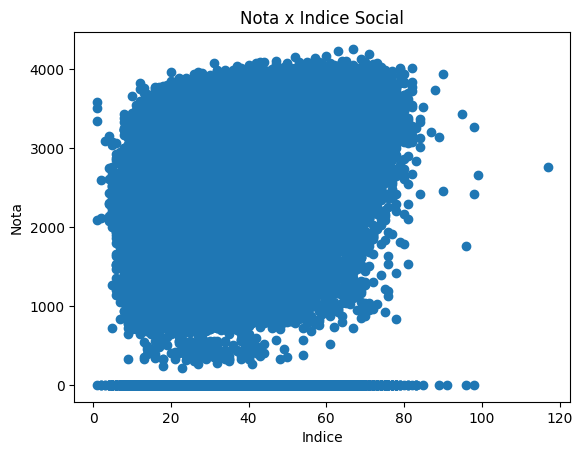

In [ ]:
plt.rcdefaults()

df_1 = df_novo

x1 = df_1['NU_INDICE_SE']
y1 = df_1['NU_NOTA_TOTAL']

plt.title('Nota x Indice Social')
plt.xlabel('Indice')
plt.ylabel('Nota')

plt.scatter(x=x1, y=y1)

plt.show()

Text(0.5, 1.0, 'Boxplot da Nota Total x Indice Social')

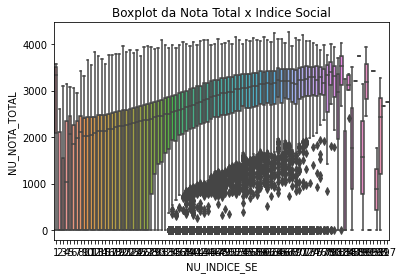

In [ ]:
#plt.figure(figsize=(10, 6))
sns.boxplot(x="NU_INDICE_SE", y = "NU_NOTA_TOTAL", data = df_novo)
plt.title("Boxplot da Nota Total x Indice Social")

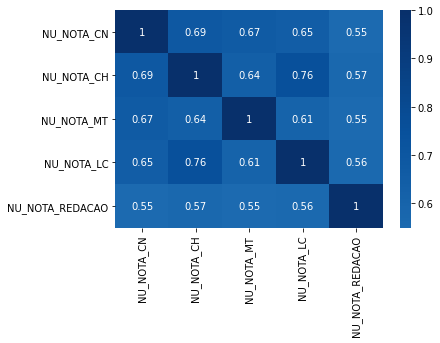

In [117]:
# Vamos ver as correlações entre as notas
correlacao = df_novo[provas].corr()
correlacao
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

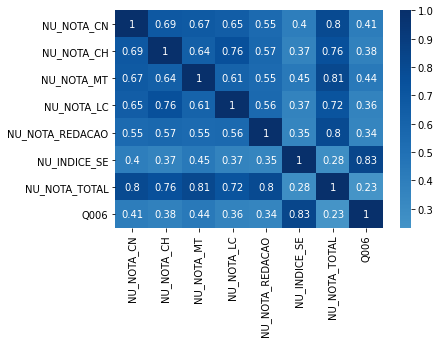

In [118]:
# Vamos ver as correlações entre as notas, indice SE e 
correlacao = df_novo[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO","NU_INDICE_SE", "NU_NOTA_TOTAL","Q006"]].corr()
correlacao
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

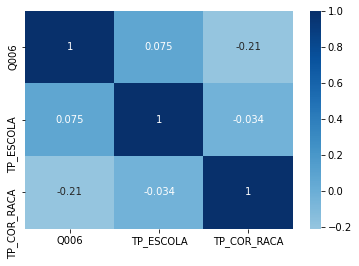

In [119]:
# Vamos ver as correlações entre as notas
correlacao = df_novo[["Q006","TP_ESCOLA","TP_COR_RACA"]] .corr()
correlacao
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

In [ ]:
#Referências para anexar dados de localidade nos dados
#https://www.kaggle.com/andrsak/clustezira-o-enem-2018-munic-pios
#https://github.com/alvaroqueiroz/Analise-Dados-ENEM/blob/master/ENEM-DATA-Notebook.ipynb
#https://github.com/kelvins/Municipios-Brasileiros/blob/main/json/municipios.json

In [ ]:
#Mostrar a média de valores por sexo em matemática

In [120]:
pd.crosstab(df_novo["NU_NOTA_MT"],df_novo["TP_SEXO"],margins=True)

TP_SEXO,F,M,All
NU_NOTA_MT,,,
0.0,49,52,101
359.0,40,23,63
359.1,20,17,37
359.2,11,9,20
359.3,24,7,31
...,...,...,...
984.2,3,11,14
984.7,0,4,4
985.0,1,5,6


#Merge dados do ENEM e localização das cidades


In [121]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="/content/gdrive/My Drive/municipios.csv"
df_municipios= pd.read_csv(nome_do_arquivo)

In [122]:
df_municipios

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [123]:
#Faz o merge com os dados de geolocalizacao
dadosMGGeolocalidado = pd.merge(left=df_novo, right=df_municipios, left_on='CO_MUNICIPIO_RESIDENCIA', right_on='codigo_ibge')
dadosMGGeolocalidado

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_INDICE_SE,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,180.0,180.0,160.0,180.0,160.0,860.0,4,5,1,3,3,8,0,2,3,1,0,1,0,1,0,1,0,0,3,0,0,3,1,1,1,3097.0,41,3170206,Uberlândia,-18.9141,-48.2749,0,31
1,190001062060,2019,3170206,Uberlândia,31,MG,18,F,1,3,1,1502202.0,Capanema,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,120.0,120.0,120.0,120.0,60.0,540.0,1,3,0,1,5,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,1,2401.5,18,3170206,Uberlândia,-18.9141,-48.2749,0,31
2,190001196928,2019,3170206,Uberlândia,31,MG,45,F,0,3,1,1718204.0,Porto Nacional,17.0,TO,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,4,3,0,1,3,1,0,1,1,1,0,0,0,0,2,0,0,4,0,1,1,0.0,24,3170206,Uberlândia,-18.9141,-48.2749,0,31
3,190001220317,2019,3170206,Uberlândia,31,MG,19,F,1,3,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,120.0,120.0,120.0,120.0,160.0,640.0,1,1,1,1,3,2,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,2606.2,16,3170206,Uberlândia,-18.9141,-48.2749,0,31
4,190001220344,2019,3170206,Uberlândia,31,MG,18,F,1,1,1,3170206.0,Uberlândia,31.0,MG,2,0,2,1.0,0,31167487.0,3170206.0,Uberlândia,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,160.0,120.0,160.0,160.0,120.0,720.0,4,5,3,1,4,2,0,1,3,0,0,1,0,1,0,1,0,0,1,0,0,3,0,1,1,2704.8,31,3170206,Uberlândia,-18.9141,-48.2749,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538891,190006040148,2019,3103751,Araporã,31,MG,22,M,1,3,1,2106706.0,Mirador,21.0,MA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,80.0,100.0,80.0,60.0,0.0,320.0,1,3,2,5,4,2,0,1,3,0,1,1,1,1,0,1,0,0,2,0,1,4,0,0,1,1993.3,33,3103751,Araporã,-18.4357,-49.1847,0,31
538892,190006040756,2019,3103751,Araporã,31,MG,24,M,0,3,1,3103751.0,Araporã,31.0,MG,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,120.0,80.0,80.0,100.0,0.0,380.0,4,2,2,2,3,3,0,1,2,1,0,1,0,1,0,0,0,0,1,0,0,2,0,0,1,2014.2,25,3103751,Araporã,-18.4357,-49.1847,0,31
538893,190006045094,2019,3103751,Araporã,31,MG,37,F,1,3,1,2504009.0,Campina Grande,25.0,PB,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,5,1,5,3,0,2,3,0,0,2,2,1,1,1,1,0,1,0,0,4,1,0,1,1682.7,41,3103751,Araporã,-18.4357,-49.1847,0,31
538894,190006045166,2019,3103751,Araporã,31,MG,16,M,1,3,1,2916005.0,Itanhém,29.0,BA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,1,5,5,0,1,2,1,1,1,0,1,0,0,0,0,2,1,0,4,1,1,1,0.0,37,3103751,Araporã,-18.4357,-49.1847,0,31


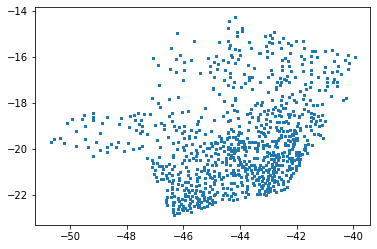

In [124]:
# Fazendo um grafico de dispersão com este dados temos a silhueta de MG
#size da linha (vai mostrar a denseidade da distribuição)
plt.scatter(dadosMGGeolocalidado['longitude'],dadosMGGeolocalidado['latitude'],s=2)

In [125]:
#Biblioteca para renderizar as coordenadas em um mapa
!pip install folium
import folium
from folium import plugins

In [127]:
# Visualização de quais municípios estão presentes no dataset
coordenadas_municipios=[]
coordenadas_brasil = [-15.788497,-47.879873]
#mapa = folium.Map(location=coordenadas_brasil,width=800, height=600, zoom_start=4,tiles='Stamen Toner')
mapa = folium.Map(location=coordenadas_brasil, zoom_start=4,tiles='Stamen Toner')

for lat,lng in zip(dadosMGGeolocalidado.latitude.values,dadosMGGeolocalidado.longitude.values):
  coordenadas_municipios.append([lat,lng])

mapa.add_child(plugins.HeatMap(data=coordenadas_municipios, blur=5))        
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dadosMGGeolocalidado.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_INDICE_SE,codigo_ibge,latitude,longitude,capital,codigo_uf
count,5.388960e+05,538896.0,5.388960e+05,538896.000000,538896.0,538896.0,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,5.227400e+05,538896.000000,522740.000000,538896.000000,538896.000000,538896.000000,538896.000000,290637.000000,538896.000000,1.084800e+05,1.084800e+05,538896.000000,108480.000000,538896.000000,108480.000000,108480.000000,108480.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,...,538896.000000,414346.000000,414346.000000,414346.000000,414346.000000,414346.000000,414346.000000,414346.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.00000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,5.388960e+05,538896.000000,538896.000000,538896.000000,538896.0
mean,1.900035e+11,2019.0,3.134395e+06,393.528445,31.0,0.0,22.024361,0.394366,1.087078,2.071778,1.031299,3.152104e+06,1359.501349,31.201865,10.078373,1.536992,2.972176,1.296671,1.006345,0.130023,3.114411e+07,3.136507e+06,91.906388,31.020179,1.018588,2.221423,1.029268,1.004093,0.001329,0.000143,0.000241,0.000486,0.000020,0.001520,0.000423,0.003620,0.000418,0.000135,0.000293,0.000226,...,0.425234,1.105212,124.647758,127.689998,119.292331,126.173922,99.186477,596.990486,3.076456,3.280832,2.012071,1.816985,3.750833,3.944425,0.140283,1.42321,2.481024,0.664206,0.256304,1.039201,0.377243,0.659882,0.094608,0.560639,0.023144,0.194102,1.363801,0.351253,0.245621,2.565055,0.276877,0.826473,0.843278,2027.405671,31.424529,3.134395e+06,-19.630247,-44.377271,0.147309,31.0
std,1.505757e+06,0.0,2.248739e+04,267.316344,0.0,0.0,7.458167,0.488714,0.428067,1.006767,0.210176,2.484819e+05,956.840550,2.483056,3.291335,0.729371,4.068752,0.520972,0.079401,0.336329,5.705574e+05,5.983256e+04,231.264723,0.561659,4.030093,0.733609,0.168558,0.105447,0.036426,0.011953,0.015530,0.022044,0.004518,0.038955,0.020565,0.060061,0.020429,0.011638,0.017120,0.015045,...,0.494379,0.678323,32.395614,43.923177,40.975168,38.812983,60.673716,193.028261,1.894080,1.704704,1.514805,1.430559,1.354242,3.345888,0.555341,0.72847,0.736910,0.711262,0.500353,0.254341,0.539170,0.492504,0.297178,0.508071,0.155850,0.395508,0.756917,0.477362,0.430455,1.035872,0.447456,0.774588,0.363539,1197.686143,11.622173,2.248739e+04,1.574495,1.762747,0.354414,0.0
min,1.900010e+11,2019.0,3.100104e+06,0.000000,31.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,1.100023e+06,-1.000000,11.000000,-1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100548e+07,1.100320e+06,-1.000000,11.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0

In [128]:
medianaIndiceSE = dadosMGGeolocalidado['NU_INDICE_SE'].mean()
desvioIndiceSE = dadosMGGeolocalidado['NU_INDICE_SE'].std()

In [129]:
dadosMGGeolocalidado['NU_INDICE_SE'].quantile(.75)

38.0

In [130]:
medianaIndiceSE 

31.4245290371426

In [131]:
# vamos criar um novo dataframe com as médias por cidades
indicativos = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO","NU_INDICE_SE", "NU_NOTA_TOTAL","nome"]
grouped = dadosMGGeolocalidado[indicativos].groupby(dadosMGGeolocalidado['nome'])
grouped = grouped.mean()


In [145]:
dadosMGGeoMean = pd.merge(left=grouped, right=df_municipios, left_on='nome', right_on='nome')
dadosMGGeoMean

,nome,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_INDICE_SE,NU_NOTA_TOTAL,codigo_ibge,latitude,longitude,capital,codigo_uf
0,Abadia dos Dourados,479.572072,509.962609,519.402703,521.071304,620.695652,29.121429,2148.822143,3100104,-18.4831,-47.3916,0,31
1,Abaeté,498.019231,521.823437,559.078297,534.052604,606.927083,28.597980,2067.272525,3100203,-19.1551,-45.4444,0,31
2,Abre Campo,472.707531,507.673790,550.776151,517.848387,549.354839,26.016287,2068.997068,3100302,-20.2996,-42.4743,0,31
3,Acaiaca,456.025862,491.611765,484.198276,502.885294,488.823529,27.279570,1670.954839,3100401,-20.3590,-43.1439,0,31
4,Aguanil,472.657143,501.598529,554.428571,513.010294,549.117647,28.166667,1900.442222,3100807,-20.9439,-45.3915,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,Água Boa,472.945745,494.400990,533.338298,498.340594,540.792079,24.262069,1720.535172,3100609,-17.9914,-42.3806,0,31
897,Água Boa,472.945745,494.400990,533.338298,498.340594,540.792079,24.262069,1720.535172,5100201,-14.0510,-52.1601,0,51
898,Água Comprida,477.900000,501.860000,532.210000,516.510000,524.000000,30.307692,1963.446154,3100708,-20.0576,-48.1069,0,31
899,Águas Formosas,457.211821,490.814154,507.939617,505.114154,558.646154,27.719603,2003.298015,3100906,-17.0802,-40.9384,0,31


In [147]:
# Visualizando as cidade pelo indice Socioeconomico 
# me guiando por https://jtemporal.com/folium/
# Fiz uma restriccao no mapa apenas para as cidade com mais de 100k habitantes, senão fica muito poluido quando em pouco zoom

cidadeMais100K = ['Belo Horizonte','Uberlândia','Contagem','Juiz de Fora','Betim','Montes Claros','Ribeirão das Neves','Uberaba',
'Governador Valadares','Ipatinga','Sete Lagoas','Divinópolis','Santa Luzia','Ibirité','Poços de Caldas','Patos de Minas',
'Pouso Alegre','Teófilo Otoni','Barbacena','Sabará','Varginha','Conselheiro Lafaiete','Vespasiano','Itabira','Araguari',
'Ubá','Passos','Coronel Fabriciano','Muriaé','Araxá','Ituiutaba','Lavras','Nova Serrana']


mapa = folium.Map(
    location=[-18.909656, -48.239061],
    zoom_start=4
)
dadosMGGeolocalidado['NU_INDICE_SE'].quantile(.75)

for _, cidade in dadosMGGeoMean.iterrows():
    if (cidade['codigo_uf'] == 31):  
      if (cidade['nome'] in cidadeMais100K): 
        if (cidade['NU_INDICE_SE'] <= dadosMGGeolocalidado['NU_INDICE_SE'].quantile(.25) ): iconSE=folium.Icon(color='red')
        elif ( dadosMGGeolocalidado['NU_INDICE_SE'].quantile(.25) <= cidade['NU_INDICE_SE'] <= dadosMGGeolocalidado['NU_INDICE_SE'].quantile(.50) ) : iconSE=folium.Icon(color='yellow')
        else : iconSE=folium.Icon(color='green')
        folium.Marker(
            location=[cidade['latitude'], cidade['longitude']],
            popup= cidade['nome'] + ' Indice Socioeconomico Medio: ' + str(cidade['NU_INDICE_SE']) + ' Nota Total Media: ' + str(cidade['NU_NOTA_TOTAL']),
            icon=iconSE,
        ).add_to(mapa)

mapa

In [159]:
# Visualização de quais municípios estão presentes no dataset
coordenadas_municipios=[]
coordenadas_brasil = [-15.788497,-47.879873]
mapa = folium.Map(location=coordenadas_brasil,width=800, height=600, zoom_start=4,tiles='Stamen Toner')

for lat,lng in zip(dadosMGGeoMean.latitude.values,dadosMGGeoMean.longitude.values):
  coordenadas_municipios.append([lat,lng])

mapa.add_child(plugins.HeatMap(data=coordenadas_municipios, blur=5))        
mapa

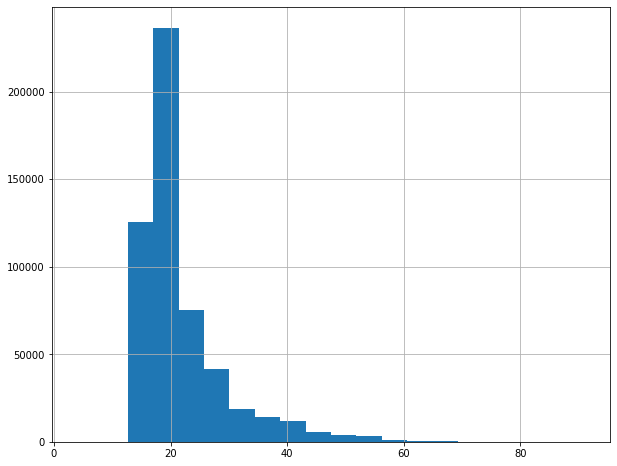

In [ ]:
dadosMGGeolocalidado["NU_IDADE"].hist(bins = 20, figsize = (10,8))

Text(0.5, 1.0, 'Boxplot MG nota total pela renda')

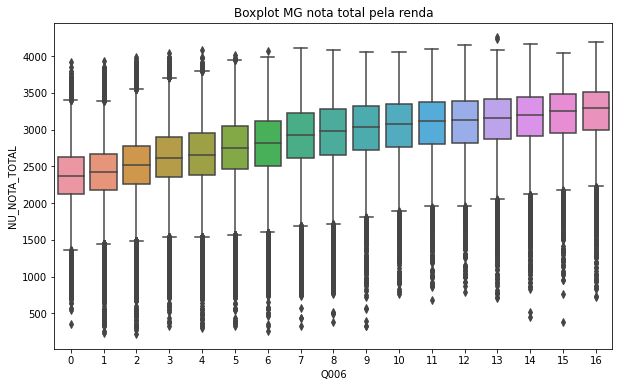

In [ ]:
#remover notas zero
dados_sem_notas_zeroGeo = dadosMGGeolocalidado.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zeroGeo.head()

# Notas pela Renda sem as notas zero
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zeroGeo, order = renda_ordenada)
plt.title("Boxplot MG nota total pela renda")

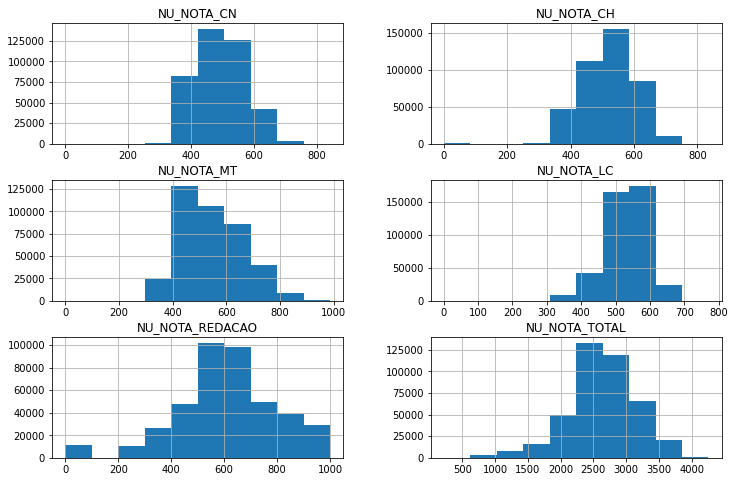

In [ ]:
dados_sem_notas_zeroGeo[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO",'NU_NOTA_TOTAL']].hist(figsize=(12, 8))
plt.show()

In [158]:
dadosMGGeolocalidado.query('NU_NOTA_TOTAL ==0')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_INDICE_SE,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
2,190001196928,2019,3170206,Uberlândia,31,MG,45,F,0,3,1,1718204.0,Porto Nacional,17.0,TO,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,4,3,0,1,3,1,0,1,1,1,0,0,0,0,2,0,0,4,0,1,1,0.0,24,3170206,Uberlândia,-18.9141,-48.2749,0,31
5,190001220356,2019,3170206,Uberlândia,31,MG,30,F,2,1,1,3170206.0,Uberlândia,31.0,MG,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,1,3,2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0.0,18,3170206,Uberlândia,-18.9141,-48.2749,0,31
7,190001220365,2019,3170206,Uberlândia,31,MG,22,M,1,3,1,3170206.0,Uberlândia,31.0,MG,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,5,3,1,2,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,28,3170206,Uberlândia,-18.9141,-48.2749,0,31
9,190001220440,2019,3170206,Uberlândia,31,MG,23,M,1,3,1,3170206.0,Uberlândia,31.0,MG,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,1,3,6,0,1,2,1,1,1,1,1,0,1,0,0,2,0,1,3,1,1,1,0.0,33,3170206,Uberlândia,-18.9141,-48.2749,0,31
13,190001223965,2019,3170206,Uberlândia,31,MG,38,F,1,2,1,3170206.0,Uberlândia,31.0,MG,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,4,8,0,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0.0,24,3170206,Uberlândia,-18.9141,-48.2749,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538881,190006020948,2019,3103751,Araporã,31,MG,34,F,1,4,1,2304400.0,Fortaleza,23.0,CE,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,5,3,5,8,0,3,3,2,0,1,1,1,1,1,0,1,2,0,1,3,1,2,1,0.0,55,3103751,Araporã,-18.4357,-49.1847,0,31
538883,190006023600,2019,3103751,Araporã,31,MG,22,M,1,3,1,5211503.0,Itumbiara,52.0,GO,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,2,2,4,4,0,1,2,1,0,1,1,1,0,0,0,0,1,0,0,3,1,1,1,0.0,34,3103751,Araporã,-18.4357,-49.1847,0,31
538884,190006028797,2019,3103751,Araporã,31,MG,18,F,1,3,2,NaN,NaN,NaN,NaN,2,0,2,1.0,0,31167207.0,3103751.0,Araporã,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,2,5,4,2,0,1,2,0,0,1,1,1,1,0,0,0,1,0,1,2,0,0,0,0.0,35,3103751,Araporã,-18.4357,-49.1847,0,31
538888,190006031812,2019,3103751,Araporã,31,MG,38,F,1,3,1,1508100.0,Tucuruí,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,2,1,3,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,23,3103751,Araporã,-18.4357,-49.1847,0,31


In [148]:
dadosMGGeolocalidado["NU_NOTA_REDACAO"].mean()

596.9904862120064

In [149]:
dadosMGGeolocalidado["NU_NOTA_REDACAO"].std()

193.02826085115524

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dadosMGGeolocalidado[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,393872.000000,414346.000000,393872.000000,414346.000000,414346.000000
mean,492.333365,520.842738,546.796208,531.215550,596.990486
std,78.027745,83.233732,115.072018,61.324732,193.028261
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,430.400000,462.400000,451.800000,497.400000,500.000000
50%,489.300000,526.500000,531.400000,536.500000,600.000000
75%,551.000000,580.300000,629.800000,572.900000,720.000000
max,842.800000,835.100000,985.500000,770.500000,1000.000000


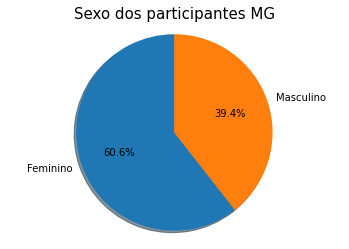

In [ ]:
#Sexo dos Participantes MG
nRow, nCol = dadosMGGeolocalidado.shape
labels = ['Feminino' , 'Masculino']
sizes = [dadosMGGeolocalidado['TP_SEXO'].value_counts()[0]/nRow, dadosMGGeolocalidado['TP_SEXO'].value_counts()[1]/nRow]
fig1, ax1 = plt.subplots()
plt.title(f'Sexo dos participantes MG', fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

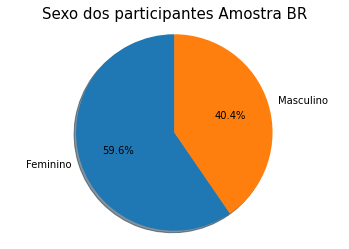

In [ ]:
#Sexo dos Participantes MG
nRow, nCol = dados.shape
labels = ['Feminino' , 'Masculino']
sizes = [dados['TP_SEXO'].value_counts()[0]/nRow, dados['TP_SEXO'].value_counts()[1]/nRow]
fig1, ax1 = plt.subplots()
plt.title(f'Sexo dos participantes Amostra BR', fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

##Desafios da Aula 5 Vou fazê-los diferente. Vou utlizar as notas para predizer se o aluno é homem ou mulher pela notas, será que existe esta correlação?

In [162]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="/content/gdrive/My Drive/mg.csv"
dadosMG = pd.read_csv(nome_do_arquivo, sep = ';')
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dadosMG["NU_NOTA_TOTAL"] = dadosMG[provas].sum(axis=1)
dadosMG

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,1044,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDABC99999BEAAAEDDDEEACEACBCCCECCCCBCDACADAEBC...,DADDCEEADBECABCDCDBCCDAEDACDDBBBAABDBEADDEEAB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,180.0,180.0,160.0,180.0,160.0,860.0,E,F,B,D,3,I,A,C,D,B,A,B,A,B,A,B,A,A,D,A,A,D,B,B,B,3097.0
1,5234,190001009861,2019,3111705,Canaã,31,MG,20,M,1,1,1,1702109.0,Araguaína,17.0,TO,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,D,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,0.0
2,16995,190001021622,2019,3104007,Araxá,31,MG,24,M,1,2,1,3104007.0,Araxá,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,B,3,F,A,B,D,A,A,B,A,B,B,A,A,A,C,B,A,C,A,A,B,0.0
3,22008,190001026636,2019,3106200,Belo Horizonte,31,MG,33,M,1,1,1,3118304.0,Conselheiro Lafaiete,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,D,D,D,3,P,B,D,D,C,A,B,B,B,A,B,A,B,B,A,A,D,A,D,B,0.0
4,22114,190001026742,2019,3162401,São João da Ponte,31,MG,23,M,1,3,1,3162401.0,São João da Ponte,31.0,MG,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BBCEA99999CBDBAECEEACDDCDEDBBCCDECDAADDBECBECA...,BCAECECADCABCEABCCCCAECCCCBACCBAECEDCBACCCBDC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,140.0,160.0,140.0,800.0,B,D,B,B,3,D,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,C,A,B,A,3398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538891,5095256,190006120182,2019,3170107,Uberaba,31,MG,59,F,2,2,2,NaN,NaN,NaN,NaN,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BBEEDDDCCCCEBCBEABDDBDECCBBDCBEDCEEDDECBA...,EDBEACDCCBDDDDEBDCCCBCCDACEEEEADBDBCBDADBECBA,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,40.0,60.0,40.0,60.0,60.0,260.0,B,C,B,B,3,C,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B,2074.6
538892,5095257,190006120183,2019,3162708,São João do Paraíso,31,MG,33,F,0,1,1,3162708.0,São João do Paraíso,31.0,MG,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999CBBDBCDCBEBEEEEAAADBDECBEBADCCEECEBCECAAC...,ACCDDDCBAEACBCBDECBCAADCCDBAACCC

In [161]:
import pandas as pd
import numpy as np
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from collections import Counter # voce passa uma array para ele e ele te devolveu um dicionario com uma 


#sumarizacao dos dados do array
colunas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO",'TP_SEXO']
#limpar base de dados, devemos remover todos os valores NaN
#dados_sem_nan = dadosMGGeolocalidado[colunas].dropna()
dados_sem_nan = dados_sem_notas_zero[colunas].dropna() # estou utilizando este dataframe por ser menor

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
X_df = dados_sem_nan[provas] 
Y_df = dados_sem_nan['TP_SEXO']

Xdummies_df = pd.get_dummies(X_df)
Ydummies_df = Y_df

X = Xdummies_df.values
Y = Ydummies_df.values


porcentagem_de_treino = 0.70

tamanho_de_treino = porcentagem_de_treino * len(Y)
tamanho_de_validacao = len(Y) - tamanho_de_treino

seed=4321

# Dividir os dados em modelo de treinamento e de teste
treino_dados, validacao_dados, treino_marcacoes, validacao_marcacoes = train_test_split(X,Y, test_size=0.30, random_state=seed)



def fit_and_predict(nome,modelo,treino_dados,treino_marcacoes):
    k = 10
    scores = cross_val_score(modelo,treino_dados,treino_marcacoes,cv = k)
    taxa_de_acerto = np.mean(scores)
    msg = "Taxa de acerto do {0}: {1}".format(nome,taxa_de_acerto)
    print(msg)
    return taxa_de_acerto


resultados = {} # dicionario

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
reultadoOneVsRest = fit_and_predict("OneVsRest",modeloOneVsRest,treino_dados,treino_marcacoes)
resultados[reultadoOneVsRest] = modeloOneVsRest
print(resultados)

from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))
reultadoOneVsOne = fit_and_predict("OneVsOne",modeloOneVsOne,treino_dados,treino_marcacoes)
resultados[reultadoOneVsOne] = modeloOneVsOne

from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
reultadoMultinomial = fit_and_predict("MultinomialNB",modeloMultinomial,treino_dados,treino_marcacoes)
resultados[reultadoMultinomial] =  modeloMultinomial

from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()
retutladoAdaBoost =  fit_and_predict("AdaBoostClassifier",modeloAdaBoost,treino_dados,treino_marcacoes)
resultados[retutladoAdaBoost ] = modeloAdaBoost

print(resultados)
maximo = max(resultados)
vencedor = resultados[maximo]
print("Vencedor: ")
print(vencedor)

vencedor.fit(treino_dados,treino_marcacoes)
resultado = vencedor.predict(validacao_dados)
acertos = (resultado == validacao_marcacoes)

total_de_acertos = sum(acertos)
total_de_elementos = len(validacao_marcacoes)
taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos

msg = "Taxa de acerto do vencedor entre os dois algoritmos do mundo real: {0}".format(taxa_de_acerto)
print(msg)

# isto aqui é para comparar se o algoritimo base é melhor que o algoritimo
# aqui estou escolhendo qual tem mais sim ou nao e esclhendo este como algoritimo
# base, pois se um algoritimo simples assim for melhor que o preditivo, tem algo errado ou falta ter mais variáveis.
# aqui calcula a eficacia do algoritimo que chuta tudo um unico valor 1 ou zero, sim ou nao
# para funcionar temos que uitlizar a mesma quantidade de dados nos dois algoritimos
# Regra do maximum a posteriori
acerto_base = max(Counter(validacao_marcacoes).values()) 
taxa_de_acerto_base = 100.0 * acerto_base / len(validacao_marcacoes)
print("Taxa de acerto Base: %f" % taxa_de_acerto_base)
print("Total de testes: %d" % len(validacao_marcacoes))



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Taxa de acerto do OneVsRest: 0.5197615026149245
{0.5197615026149245: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None)}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Taxa de acerto do OneVsOne: 0.5197615026149245
Taxa de acerto do MultinomialNB: 0.6144166785372702
Taxa de acerto do AdaBoostClassifier: 0.6558383020288557
{0.5197615026149245: OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=0, tol=0.0001, verbose=0),
                   n_jobs=None), 0.6144166785372702: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), 0.6558383020288557: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)}
Vencedor: 
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Taxa de acerto do vencedo

In [ ]:
Se tivessemos chutado todos do sexo feminino, acertaríamos 60.6%, pois 60.6% dos alunos que fizeram o ENEM em MG são mulheres.
Aqui caberia utilizar outros algoritimos ou mesmo ajustar melhor os parametros destes algoritimos testados. 

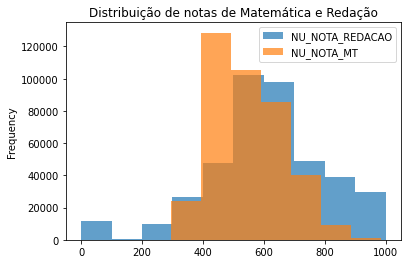

In [163]:
dadosMG['NU_NOTA_REDACAO'].plot.hist(bins = 10, alpha=0.7,
                                title='Distribuição de notas de Matemática e Redação',
                                legend=True)
plot1 = dadosMG['NU_NOTA_MT'].plot.hist(bins = 10, alpha=0.7,legend=True)

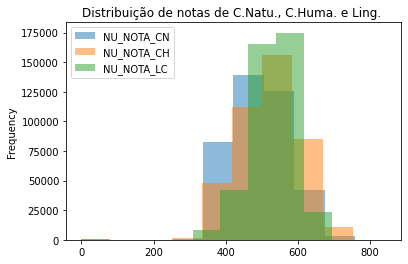

In [164]:
dadosMG['NU_NOTA_CN'].plot.hist(bins = 10, alpha=0.5,
                                title='Distribuição de notas de C.Natu., C.Huma. e Ling. ',
                                legend=True)
dadosMG['NU_NOTA_CH'].plot.hist(bins = 10, alpha=0.5,legend=True)
plot2 = dadosMG['NU_NOTA_LC'].plot.hist(bins = 10, alpha=0.5,legend=True)

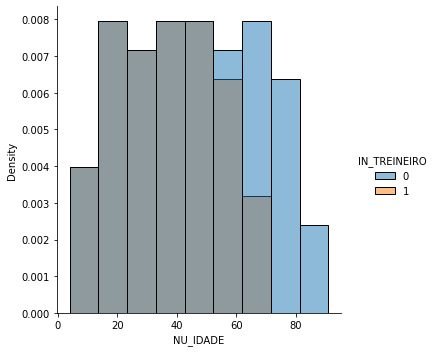

In [165]:
treineiros = dadosMG.groupby("IN_TREINEIRO")["NU_IDADE"].value_counts()
sns.displot(treineiros, x="NU_IDADE", hue="IN_TREINEIRO",stat ="density")

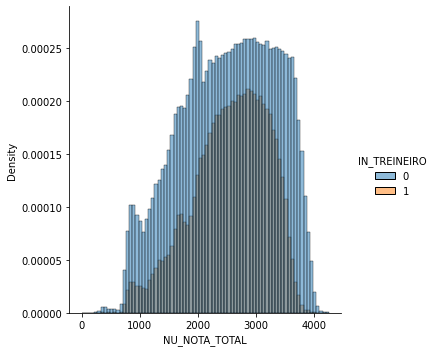

In [166]:
treineiros = dadosMG.groupby("IN_TREINEIRO")["NU_NOTA_TOTAL"].value_counts()
sns.displot(treineiros, x="NU_NOTA_TOTAL", hue="IN_TREINEIRO",stat ="density")

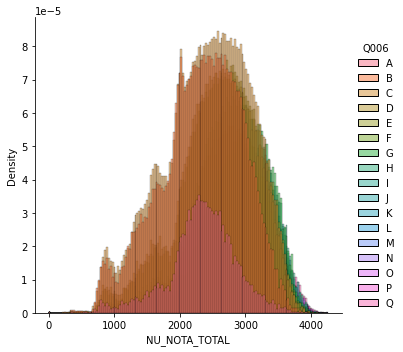

In [167]:
classeSE = dadosMG.groupby("Q006")["NU_NOTA_TOTAL"].value_counts()
sns.displot(classeSE, x="NU_NOTA_TOTAL", hue="Q006",stat ="density")

In [187]:
#Desafio05: Comparar as distribuições das provas em inglês espanhol
ingles = dadosMG.query("TP_LINGUA == '0' ").shape[0]
espanhol = dadosMG.query("TP_LINGUA == '1' ").shape[0]
total = dadosMG.shape[0]
proporcaoIngles = round(((ingles/total))*100,4)
proporcaoEspanhol = round(((espanhol/total))*100,4)
print(f'Proporção Ingles {proporcaoIngles} Proporção Espanhol {proporcaoEspanhol}')

Proporção Ingles 57.4766 Proporção Espanhol 42.5234


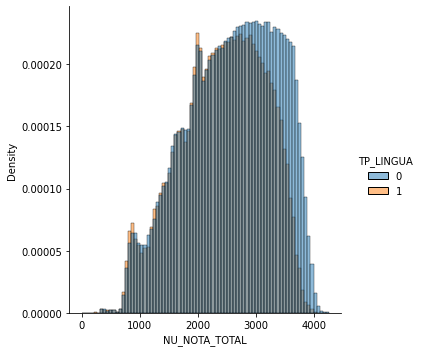

In [178]:
# Existe um percentual nota maior para quem escolheu ingles
ingles = dadosMG.groupby("TP_LINGUA")["NU_NOTA_TOTAL"].value_counts()
sns.displot(ingles, x="NU_NOTA_TOTAL", hue="TP_LINGUA",stat ="density")

In [188]:
#quantidade de celulares x computadores
celular = dadosMGGeolocalidado.query("Q022 >= 1 ").shape[0]
computador= dadosMGGeolocalidado.query("Q024 >= 1 ").shape[0]
total = dadosMGGeolocalidado.shape[0]
proporcaoCelular = round(((celular/total))*100,4)
proporcaoComputador = round(((computador/total))*100,4)
print(f'Proporção Celular {proporcaoCelular} Proporção Computador {proporcaoComputador}')

Proporção Celular 98.7083 Proporção Computador 65.4581


In [198]:
#Proporção Internet 84% com e 16% sem internet 
internet = dadosMG.query("Q025=='A'").shape[0]

UndefinedVariableError: ignored

In [197]:
dadosMG.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,1044,190001005671,2019,3170206,Uberlândia,31,MG,21,M,1,1,1,3170206.0,Uberlândia,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDABC99999BEAAAEDDDEEACEACBCCCECCCCBCDACADAEBC...,DADDCEEADBECABCDCDBCCDAEDACDDBBBAABDBEADDEEAB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,180.0,180.0,160.0,180.0,160.0,860.0,E,F,B,D,3,I,A,C,D,B,A,B,A,B,A,B,A,A,D,A,A,D,B,B,B,3097.0
1,5234,190001009861,2019,3111705,Canaã,31,MG,20,M,1,1,1,1702109.0,Araguaína,17.0,TO,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,D,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,0.0
2,16995,190001021622,2019,3104007,Araxá,31,MG,24,M,1,2,1,3104007.0,Araxá,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,B,3,F,A,B,D,A,A,B,A,B,B,A,A,A,C,B,A,C,A,A,B,0.0
3,22008,190001026636,2019,3106200,Belo Horizonte,31,MG,33,M,1,1,1,3118304.0,Conselheiro Lafaiete,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,D,D,D,3,P,B,D,D,C,A,B,B,B,A,B,A,B,B,A,A,D,A,D,B,0.0
4,22114,190001026742,2019,3162401,São João da Ponte,31,MG,23,M,1,3,1,3162401.0,São João da Ponte,31.0,MG,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BBCEA99999CBDBAECEEACDDCDEDBBCCDECDAADDBECBECA...,BCAECECADCABCEABCCCCAECCCCBACCBAECEDCBACCCBDC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,140.0,160.0,140.0,800.0,B,D,B,B,3,D,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,C,A,B,A,3398.0


In [202]:
zero = dadosMG.query("NU_NOTA_TOTAL == 0 ").shape[0]
maiorZero = dadosMG.query("NU_NOTA_TOTAL > 0 ").shape[0]
total = dadosMG.shape[0]
proporcaoZero = round(((zero/(zero + maiorZero)))*100,4)
proporcaoMaior = round(((maiorZero/(zero + maiorZero)))*100,4)
print(f'Proporção Zero {proporcaoZero} Proporção Não zerou {proporcaoMaior} {zero} {maiorZero}')

Proporção Zero 23.0037 Proporção Não zerou 76.9963 123966 414930


In [203]:
# Vamos fazer uma nuvem com o nome das cidades de acordo com o quantidade de canditados
#https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# eliminar as colunas com valores ausentes
summary = dadosMG.dropna(subset=['NO_MUNICIPIO_RESIDENCIA'], axis=0)['NO_MUNICIPIO_RESIDENCIA']
summary

0                  Uberlândia
1                       Canaã
2                       Araxá
3              Belo Horizonte
4           São João da Ponte
                 ...         
538891                Uberaba
538892    São João do Paraíso
538893            Capinópolis
538894     Ribeirão das Neves
538895                  Betim
Name: NO_MUNICIPIO_RESIDENCIA, Length: 538896, dtype: object

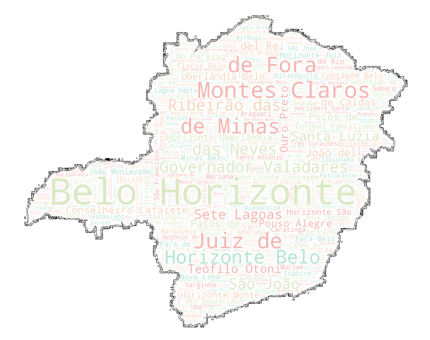

In [222]:
all_summary = " ".join(s for s in summary)

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])
 
#imagem de mascara
arquivo="/content/gdrive/My Drive/minas.png"
image_mask = np.array(Image.open(arquivo))

def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[4, 77, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]
    rand = random_state.randint(0, len(colors) - 1) 
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])


# Create a word cloud image
#wc = WordCloud(background_color="white", max_words=2000, mask=image_mask, stopwords="", contour_width=3, width=1600, height=800)

wc = WordCloud(stopwords="", mask=image_mask, background_color="white", contour_width=1,
               max_words=2000, max_font_size=256,
               random_state=42, width=image_mask.shape[1],
               height=image_mask.shape[0], color_func=multi_color_func)

#mask_colors = ImageColorGenerator(image_mask)
#wc = WordCloud(stopwords="",
#               mask=image_mask, background_color="white",
#               max_words=2000, max_font_size=256,
#               random_state=42, width=image_mask.shape[1],
#               height=image_mask.shape[0], color_func=mask_colors)

# Generate a wordcloud
wc.generate(all_summary)


# gerar uma wordcloud
#wordcloud = WordCloud(stopwords="", background_color="black", width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wc);
#wordcloud.to_file("E:/AnaliseTuneover/tuneoverwordcloud.png")